## Models for Text only

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
import re
from gensim import corpora
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import warnings
warnings.filterwarnings("ignore")

import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

%matplotlib inline

In [2]:
feature_df = pd.read_csv('cleaned_csv/feature_df.csv',low_memory=False)
print('rows:',len(feature_df))

rows: 239850


In [3]:
feature_df.isnull().sum()

sentiment                         0
cleaned_text                    252
original_word_count               0
original_average_word_length      0
stopword_ratio                    0
dtype: int64

In [4]:
feature_df.dropna(inplace = True)

In [5]:
feature_df.isnull().sum()

sentiment                       0
cleaned_text                    0
original_word_count             0
original_average_word_length    0
stopword_ratio                  0
dtype: int64

In [6]:
feature_df = feature_df.sample(n=5000)#create sample

In [7]:
feature_df.sentiment.value_counts()

Poor       1679
Good       1668
Neutral    1653
Name: sentiment, dtype: int64

In [8]:
feature_df.head(1)

,sentiment,cleaned_text,original_word_count,original_average_word_length,stopword_ratio
81637,Good,tasty fast friendly,0.037037,0.071685,0.5


In [9]:
y = feature_df["sentiment"] #creating y

In [10]:
y

81637        Good
193924       Poor
35088     Neutral
141513       Good
238327       Poor
           ...   
69958     Neutral
182613       Poor
168792       Poor
38428     Neutral
100970       Good
Name: sentiment, Length: 5000, dtype: object

In [11]:
x = feature_df["cleaned_text"] #creating x

In [12]:
x.head(1)

81637    tasty fast friendly
Name: cleaned_text, dtype: object

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) #train test split

In [14]:
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (4000,)
y_train shape: (4000,)

x_test shape: (1000,)
y_test shape: (1000,)



#### Count Vectors

In [110]:
#Count Vectors as features

In [111]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(feature_df['cleaned_text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(x_train)
xvalid_count =  count_vect.transform(x_test)

In [112]:
#def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:

    
dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro'] #evaluating metrics
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_count, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_count, y_train)
    y_pred = clf.predict(xvalid_count)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9000    0.7895    0.8411       342
     Neutral     0.7403    0.9077    0.8155       336
        Good     0.8194    0.7329    0.7738       322

    accuracy                         0.8110      1000
   macro avg     0.8199    0.8100    0.8101      1000
weighted avg     0.8204    0.8110    0.8108      1000

RF
              precision    recall  f1-score   support

        Poor     0.8858    0.8392    0.8619       342
     Neutral     0.7665    0.8988    0.8274       336
        Good     0.8227    0.7205    0.7682       322

    accuracy                         0.8210      1000
   macro avg     0.8250    0.8195    0.8192      1000
weighted avg     0.8254    0.8210    0.8201      1000

SVM
              precision    recall  f1-score   support

        Poor     0.9409    0.6988    0.8020       342
     Neutral     0.7275    0.8423    0.7807       336
        Good     0.7087    0.7857    0.7452       322

    ac

In [113]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Model Performance under Count Vectorization')

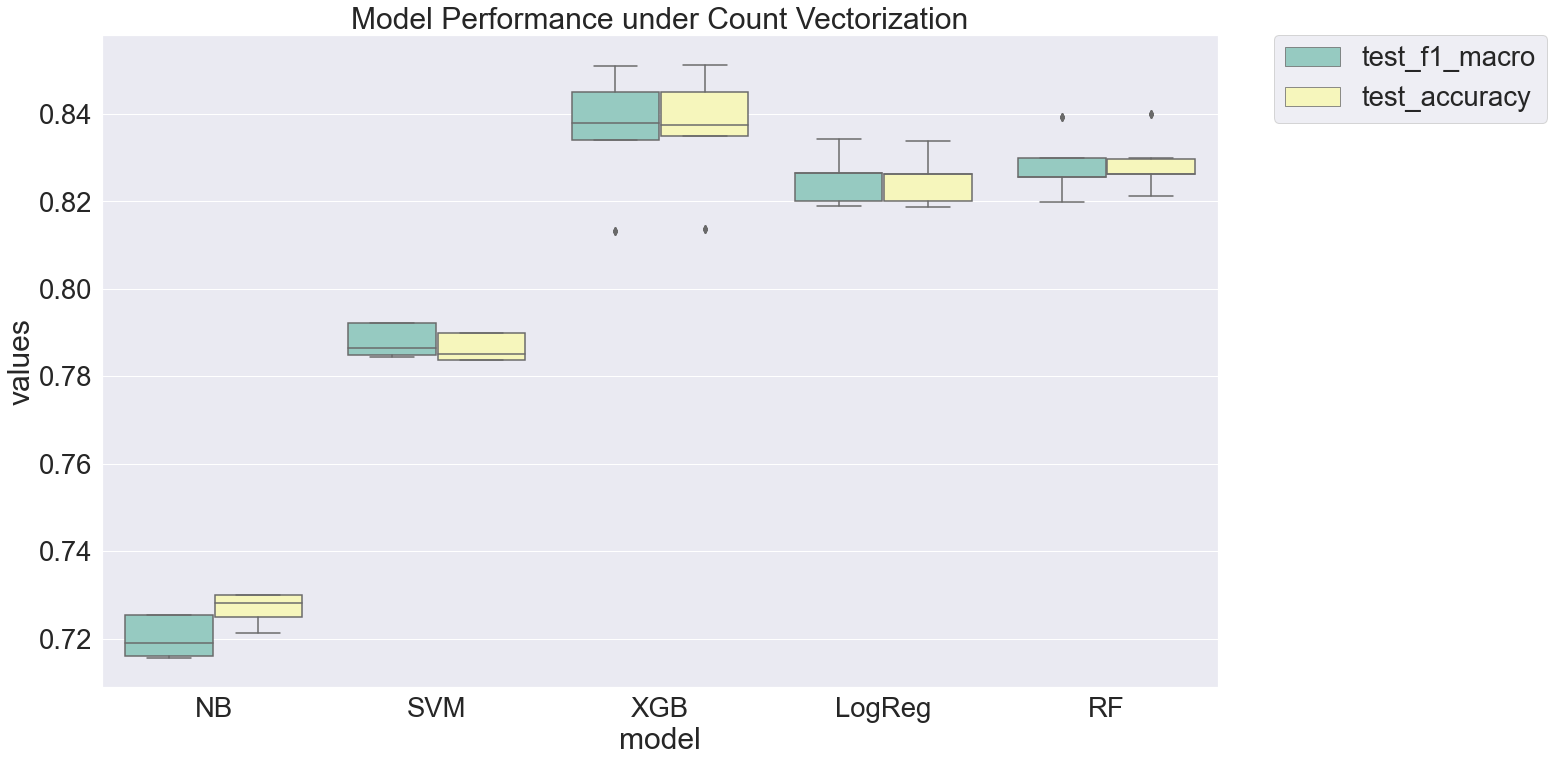

In [114]:
import matplotlib.pyplot as plt #model comparison
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Model Performance under Count Vectorization')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

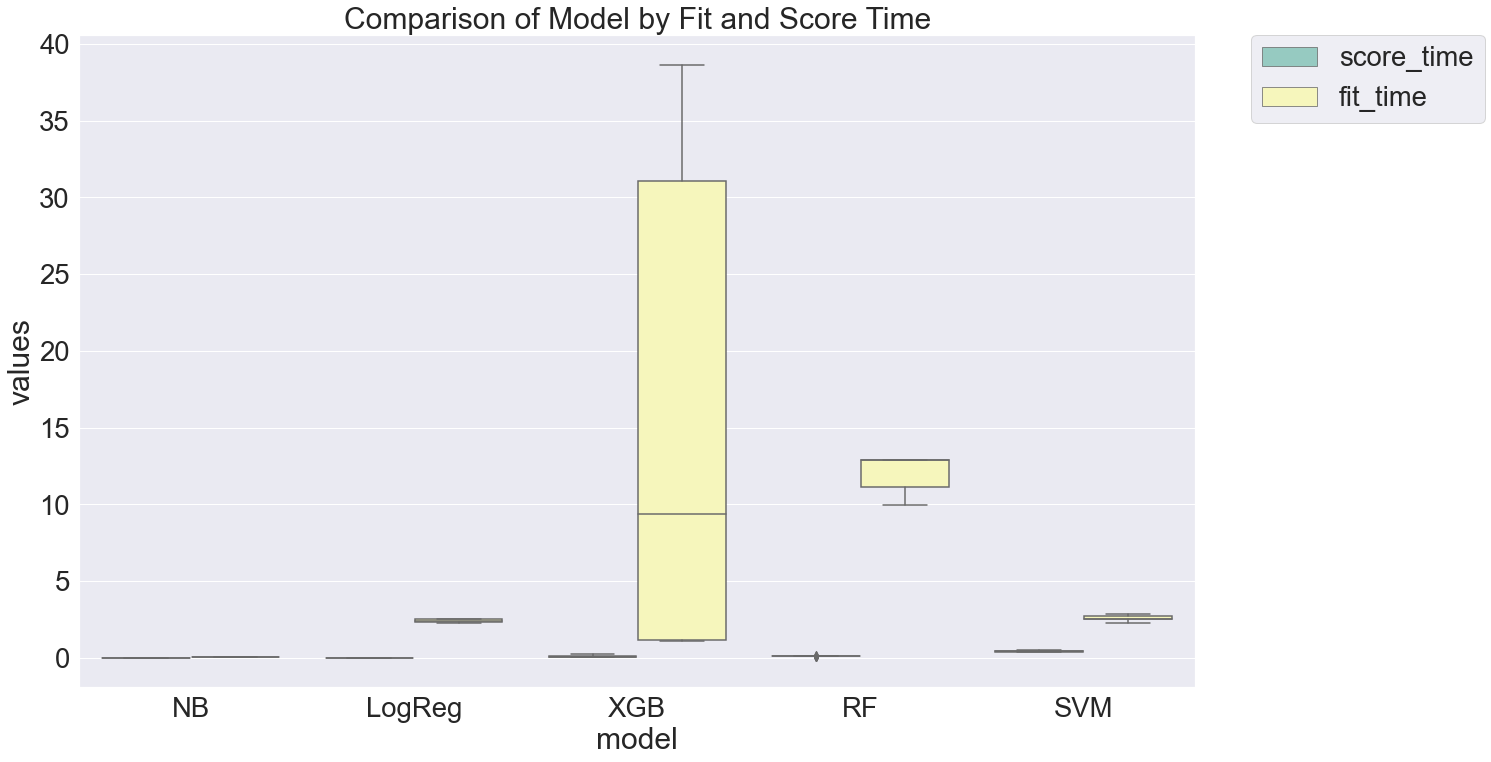

In [115]:
plt.figure(figsize=(20, 12)) #fit time comparision
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [116]:
metrics = list(set(results_long_nofit.metrics.values)) #accuracy and F1 score on test set
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.825167  0.004986      0.825376  0.005097
NB          0.727417  0.002583      0.720851  0.004263
RF          0.829500  0.005577      0.828985  0.005644
SVM         0.786167  0.002803      0.787694  0.003364
XGB         0.836792  0.013236      0.836393  0.013393

In [117]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time             fit_time           
             mean       std       mean        std
model                                            
LogReg   0.012286  0.001091   2.430061   0.081418
NB       0.009512  0.000911   0.025483   0.005110
RF       0.108275  0.021668  11.977493   1.030796
SVM      0.434026  0.033227   2.572917   0.176071
XGB      0.081878  0.063664  14.510643  14.900338

### The following are 3 TF-IDF methods

#### word level tf-idf

In [24]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(feature_df['cleaned_text'])
xtrain_tfidf =  tfidf_vect.transform(x_train)
xvalid_tfidf =  tfidf_vect.transform(x_test)

In [25]:
# Model building for word level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf, y_train)
    y_pred = clf.predict(xvalid_tfidf)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9094    0.7632    0.8299       342
     Neutral     0.7033    0.8958    0.7880       336
        Good     0.7965    0.7050    0.7479       322

    accuracy                         0.7890      1000
   macro avg     0.8031    0.7880    0.7886      1000
weighted avg     0.8038    0.7890    0.7894      1000

RF
              precision    recall  f1-score   support

        Poor     0.8869    0.8480    0.8670       342
     Neutral     0.7712    0.8929    0.8276       336
        Good     0.8134    0.7174    0.7624       322

    accuracy                         0.8210      1000
   macro avg     0.8238    0.8194    0.8190      1000
weighted avg     0.8243    0.8210    0.8201      1000

SVM
              precision    recall  f1-score   support

        Poor     0.9494    0.7135    0.8147       342
     Neutral     0.6779    0.9018    0.7739       336
        Good     0.7770    0.7143    0.7443       322

    ac

In [27]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

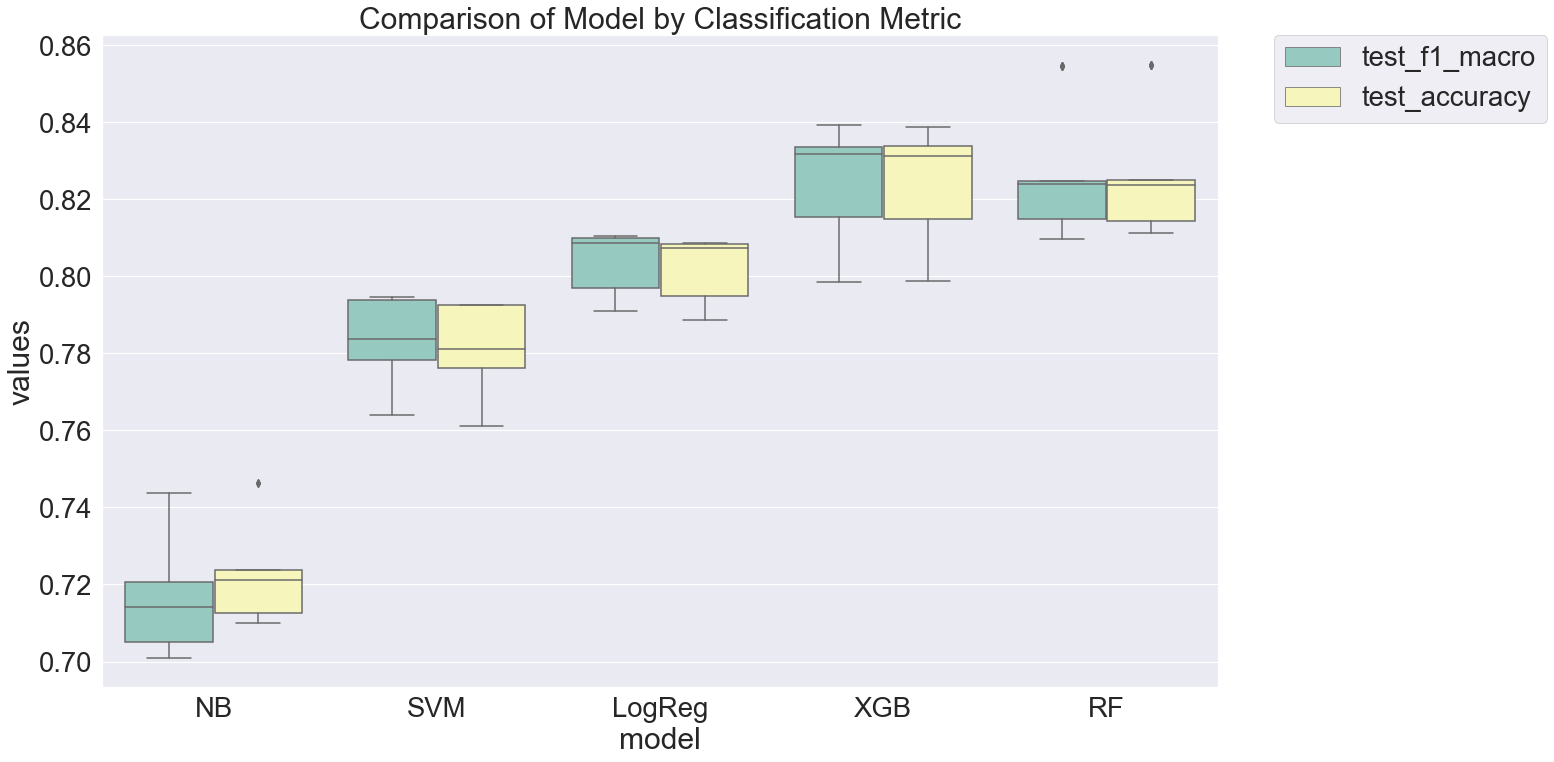

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

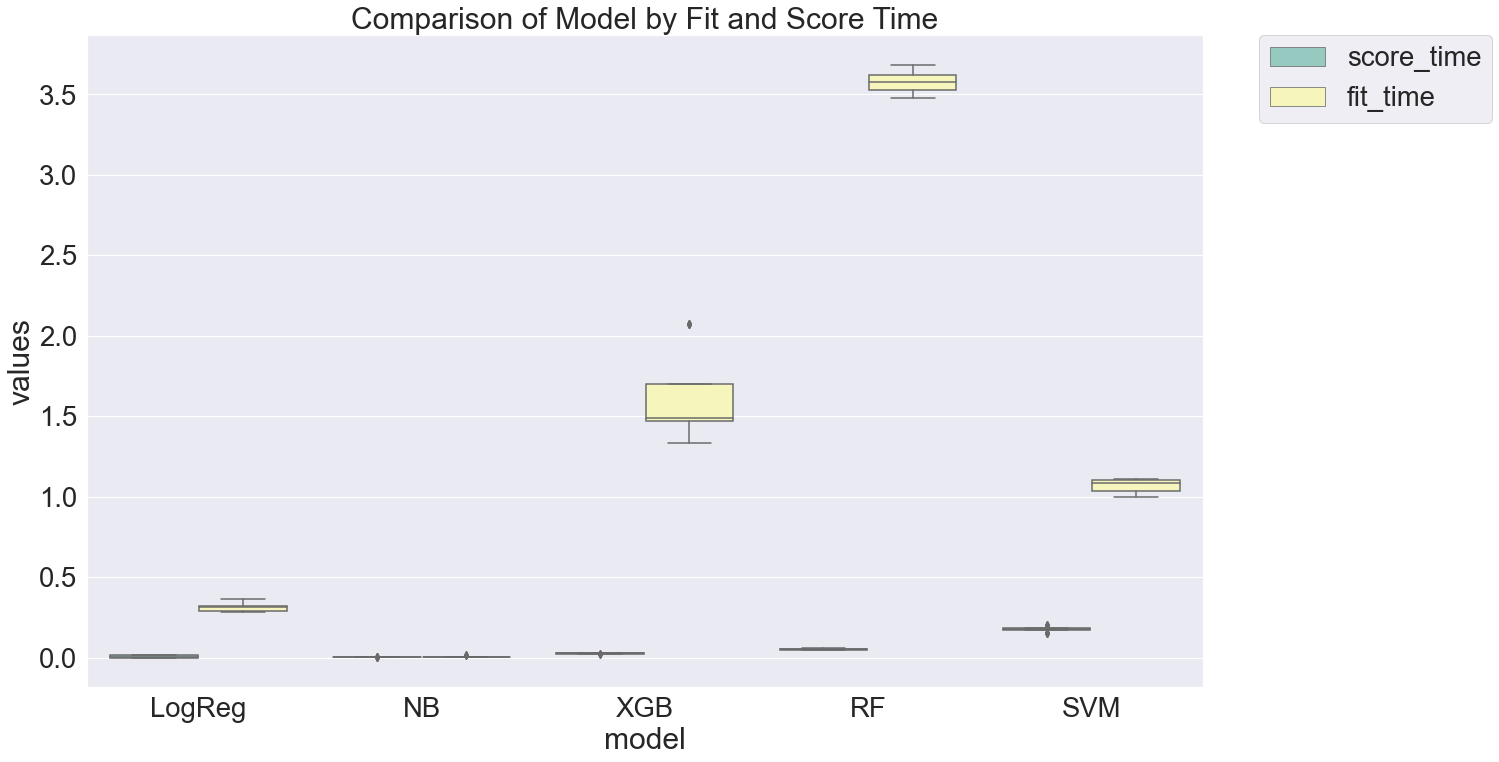

In [29]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [30]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.801417  0.007985      0.803122  0.007667
NB          0.720333  0.010453      0.714318  0.012603
RF          0.828000  0.016141      0.827906  0.016022
SVM         0.781833  0.012122      0.784010  0.011734
XGB         0.821458  0.015125      0.821621  0.015268

In [31]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.005849  0.006650  0.314886  0.028384
NB       0.003878  0.000425  0.007679  0.002130
RF       0.051322  0.003789  3.571965  0.063293
SVM      0.176683  0.015428  1.063564  0.043766
XGB      0.025935  0.002686  1.651003  0.264037

#### ngram level tf-idf (ngram (2,3))

In [32]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [33]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.7617    0.4766    0.5863       342
     Neutral     0.4921    0.8304    0.6179       336
        Good     0.6575    0.4472    0.5323       322

    accuracy                         0.5860      1000
   macro avg     0.6371    0.5847    0.5789      1000
weighted avg     0.6376    0.5860    0.5796      1000

RF
              precision    recall  f1-score   support

        Poor     0.7606    0.4181    0.5396       342
     Neutral     0.4692    0.8601    0.6071       336
        Good     0.6735    0.4099    0.5097       322

    accuracy                         0.5640      1000
   macro avg     0.6344    0.5627    0.5521      1000
weighted avg     0.6346    0.5640    0.5527      1000

SVM
              precision    recall  f1-score   support

        Poor     0.7167    0.4883    0.5809       342
     Neutral     0.5476    0.6161    0.5798       336
        Good     0.5347    0.6460    0.5851       322

    ac

In [35]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

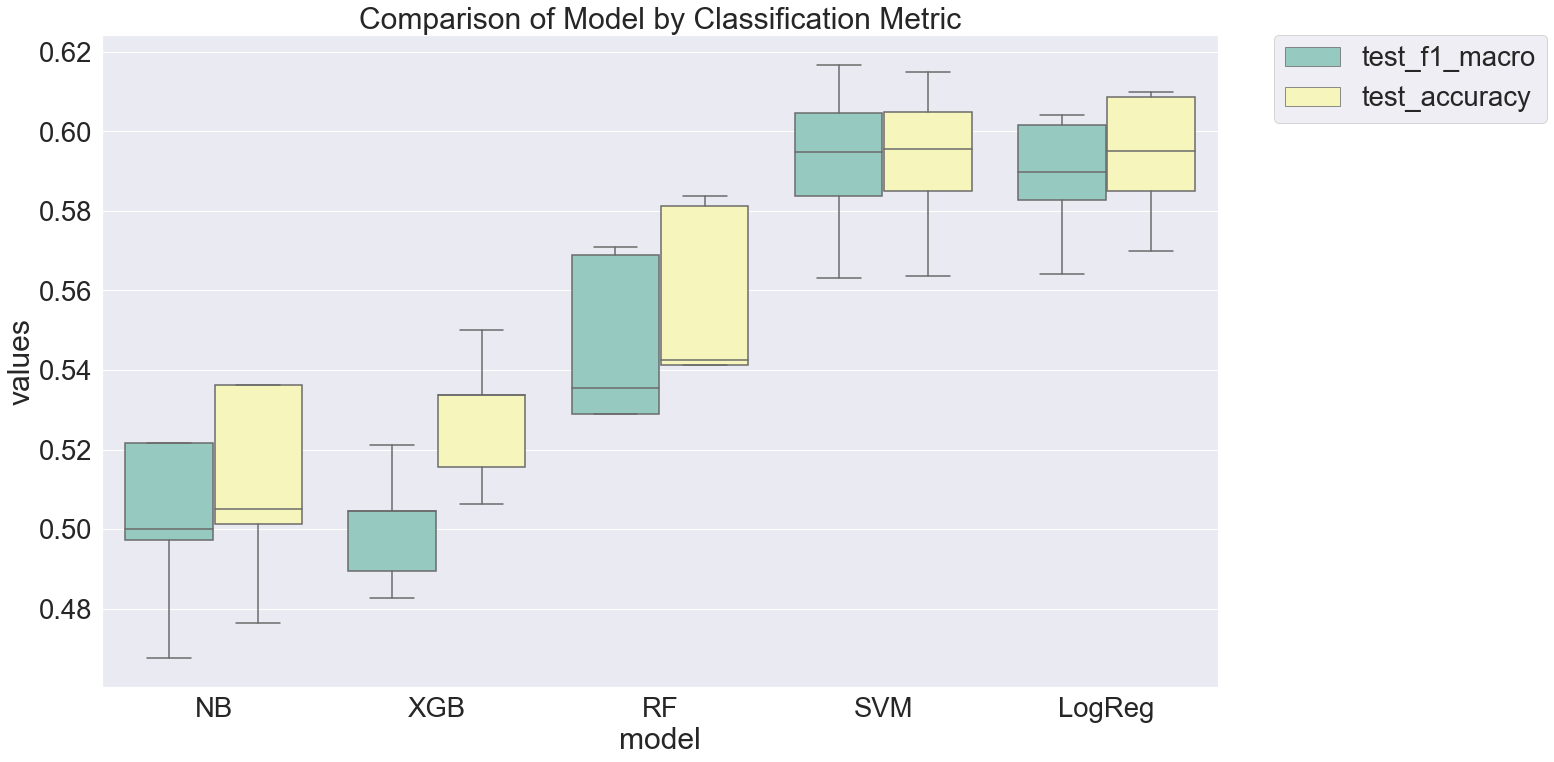

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

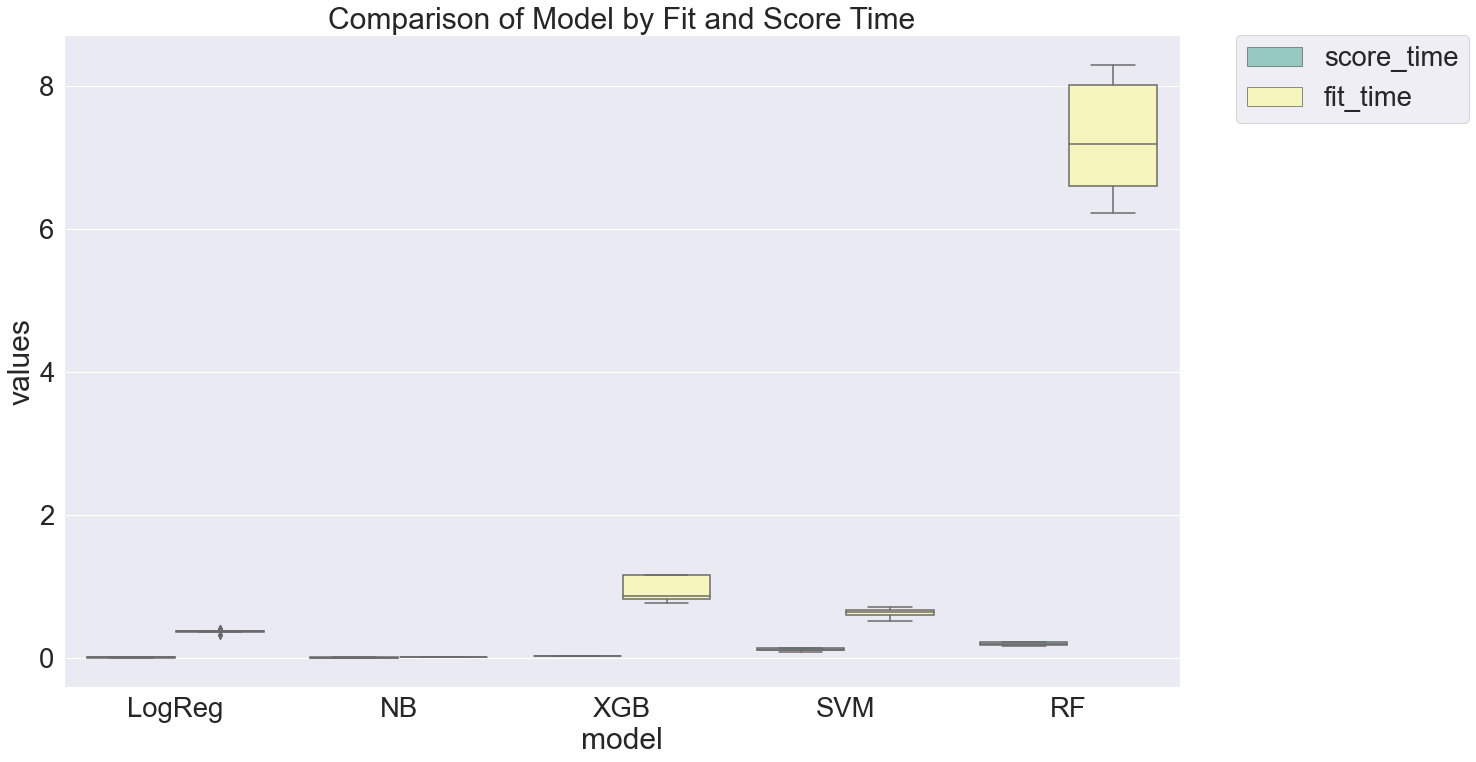

In [37]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [38]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.594083  0.013167      0.589078  0.012689
NB          0.512542  0.021614      0.503362  0.018197
RF          0.558292  0.018899      0.546497  0.018076
SVM         0.593208  0.017360      0.592888  0.018071
XGB         0.527375  0.014408      0.500417  0.012492

In [39]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.006289  0.003849  0.368971  0.018246
NB       0.004787  0.000994  0.009309  0.000992
RF       0.194056  0.018099  7.197213  0.765239
SVM      0.110604  0.022490  0.627200  0.066021
XGB      0.022558  0.001267  0.950388  0.168963

#### characters level tf-idf

In [40]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_test)

In [41]:
# Model building for char level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram_chars, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram_chars, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram_chars)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.8239    0.7251    0.7714       342
     Neutral     0.7173    0.8006    0.7567       336
        Good     0.7315    0.7360    0.7337       322

    accuracy                         0.7540      1000
   macro avg     0.7576    0.7539    0.7539      1000
weighted avg     0.7583    0.7540    0.7543      1000

RF
              precision    recall  f1-score   support

        Poor     0.8116    0.6930    0.7476       342
     Neutral     0.7082    0.7946    0.7489       336
        Good     0.6918    0.7112    0.7014       322

    accuracy                         0.7330      1000
   macro avg     0.7372    0.7329    0.7327      1000
weighted avg     0.7383    0.7330    0.7332      1000

SVM
              precision    recall  f1-score   support

        Poor     0.8713    0.6930    0.7720       342
     Neutral     0.7198    0.8333    0.7724       336
        Good     0.7257    0.7640    0.7443       322

    ac

In [42]:
final

,fit_time,score_time,test_accuracy,test_f1_macro,model
0,0.630538,0.004986,0.77250,0.772296,LogReg
1,0.628856,0.008976,0.75000,0.750240,LogReg
2,0.805865,0.004986,0.74000,0.740445,LogReg
3,0.638911,0.008976,0.77750,0.778626,LogReg
4,0.587023,0.006981,0.75625,0.756477,LogReg
5,3.430151,0.049888,0.76875,0.768340,RF
6,3.325986,0.049867,0.74750,0.748100,RF
7,3.549984,0.048869,0.73125,0.731891,RF
8,3.268502,0.049474,0.72625,0.726692,RF
9,3.380038,0.048870,0.70750,0.707483,RF


In [43]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

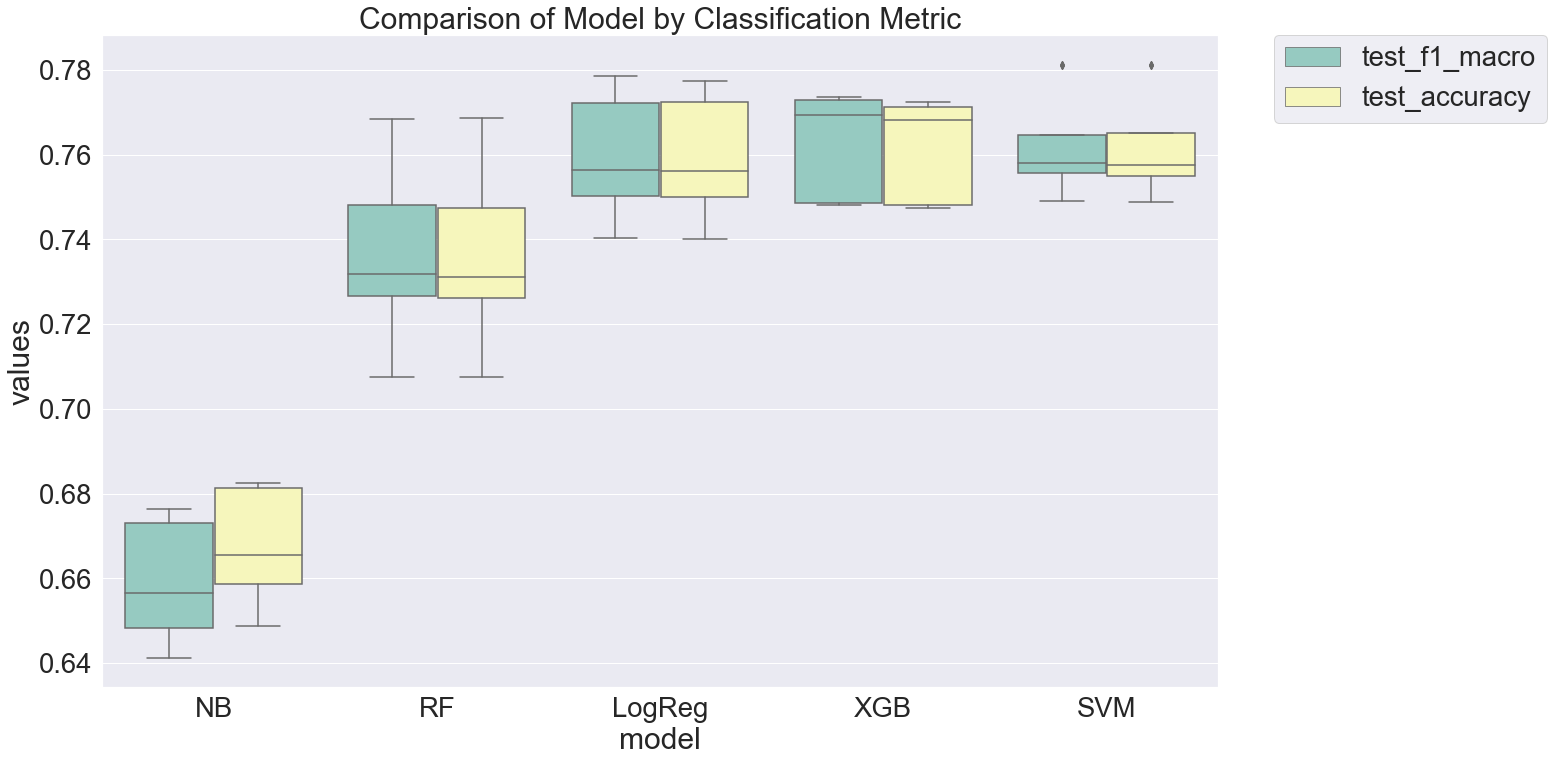

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

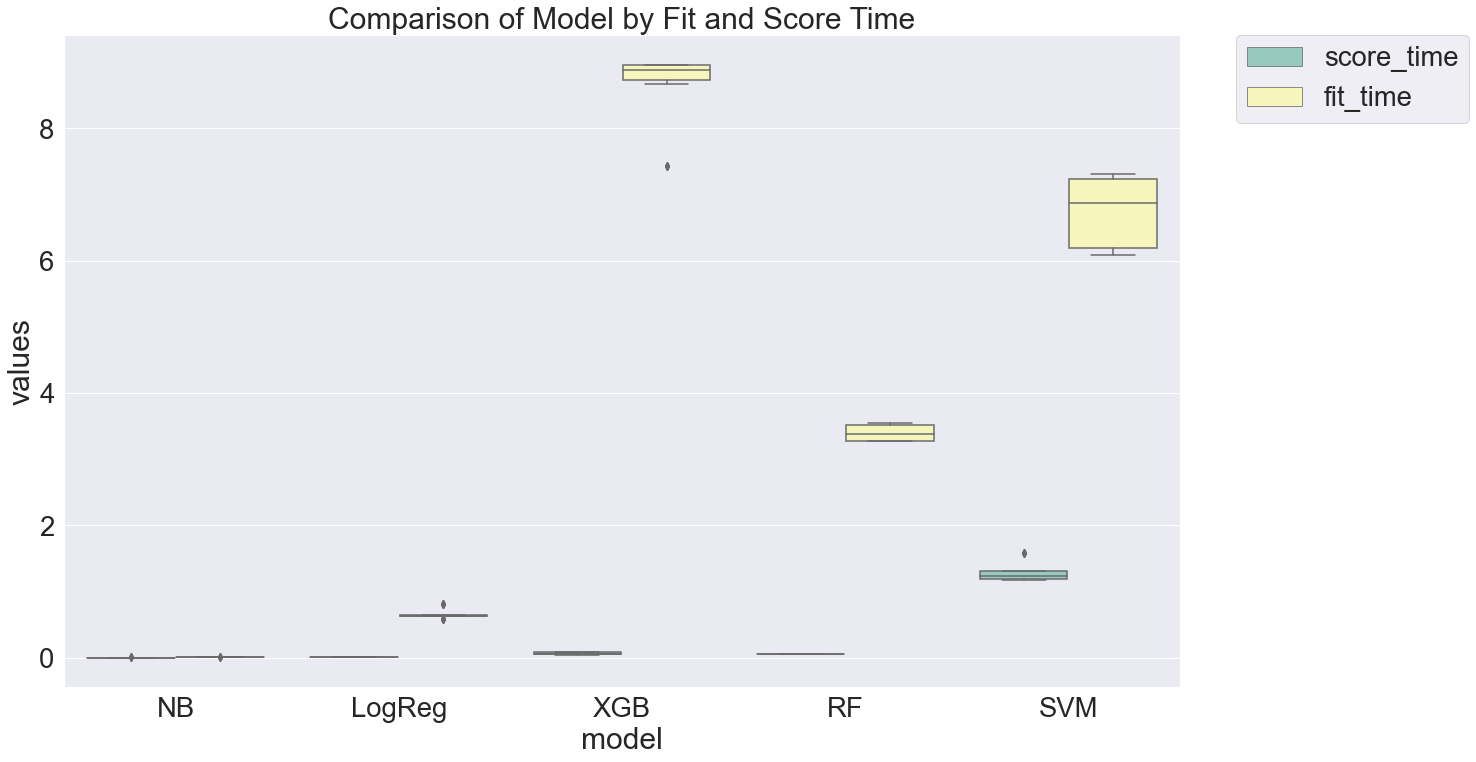

In [45]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [46]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.757875  0.013686      0.758130  0.013627
NB          0.666375  0.012757      0.657996  0.013365
RF          0.735000  0.017854      0.735352  0.017744
SVM         0.759333  0.009496      0.759505  0.009243
XGB         0.761667  0.011278      0.762668  0.011798

In [47]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.006515  0.001712  0.661851  0.082888
NB       0.002634  0.003902  0.009674  0.000829
RF       0.049366  0.000442  3.391486  0.110519
SVM      1.299263  0.163506  6.721550  0.473213
XGB      0.066886  0.018136  8.648842  0.561120

## Expirement

## ngram range

#### ngram level tf-idf (ngram (3,4))

In [48]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(3,4), max_features=5000) #change ngram range
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [49]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9024    0.1082    0.1932       342
     Neutral     0.3576    0.9792    0.5239       336
        Good     0.6410    0.0776    0.1385       322

    accuracy                         0.3910      1000
   macro avg     0.6337    0.3883    0.2852      1000
weighted avg     0.6352    0.3910    0.2867      1000

RF
              precision    recall  f1-score   support

        Poor     0.9000    0.1053    0.1885       342
     Neutral     0.3552    0.9821    0.5217       336
        Good     0.6129    0.0590    0.1076       322

    accuracy                         0.3850      1000
   macro avg     0.6227    0.3821    0.2726      1000
weighted avg     0.6245    0.3850    0.2744      1000

SVM
              precision    recall  f1-score   support

        Poor     0.5000    0.2076    0.2934       342
     Neutral     0.3643    0.8988    0.5185       336
        Good     0.6207    0.0559    0.1026       322

    ac

In [50]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

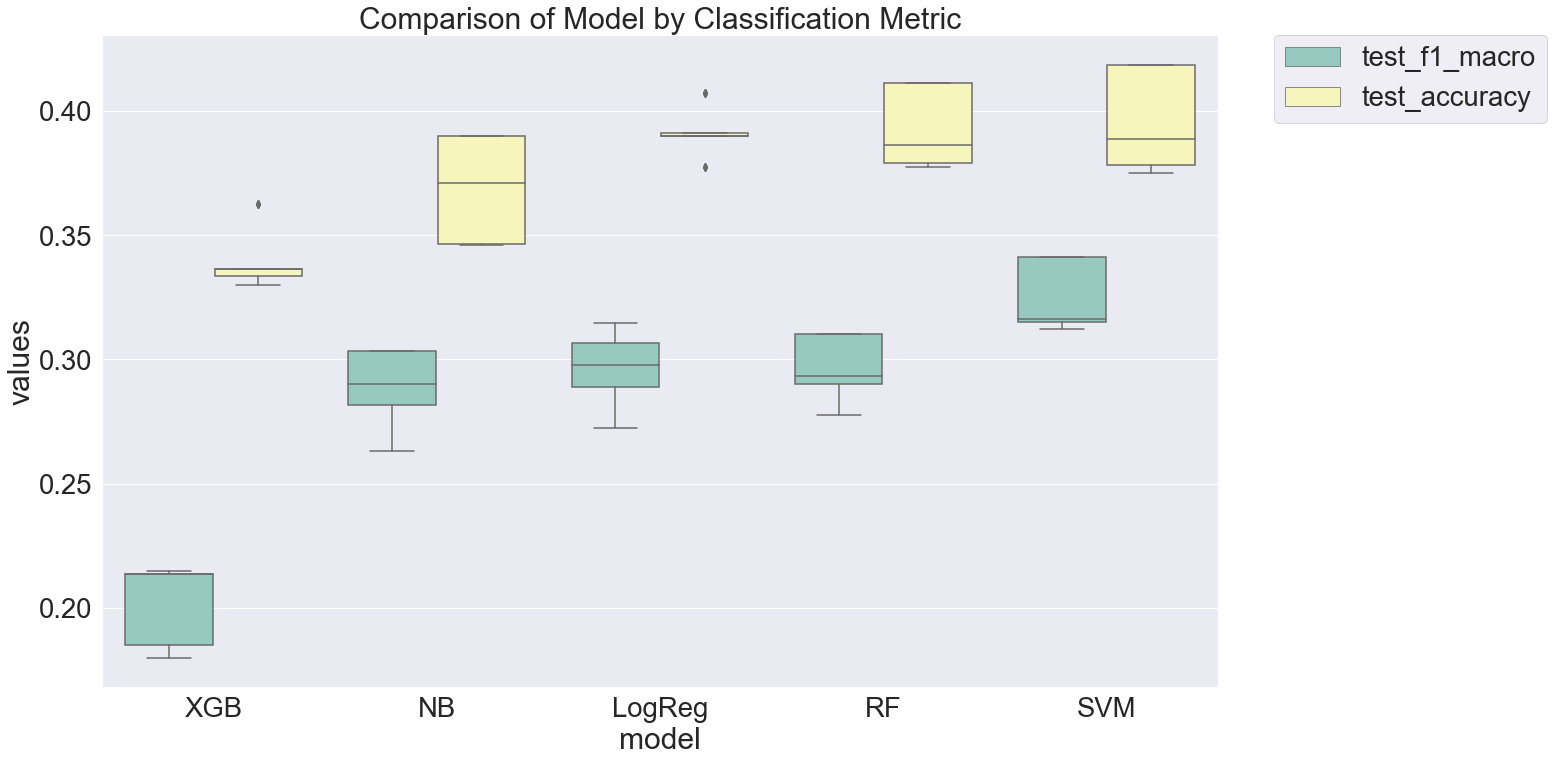

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

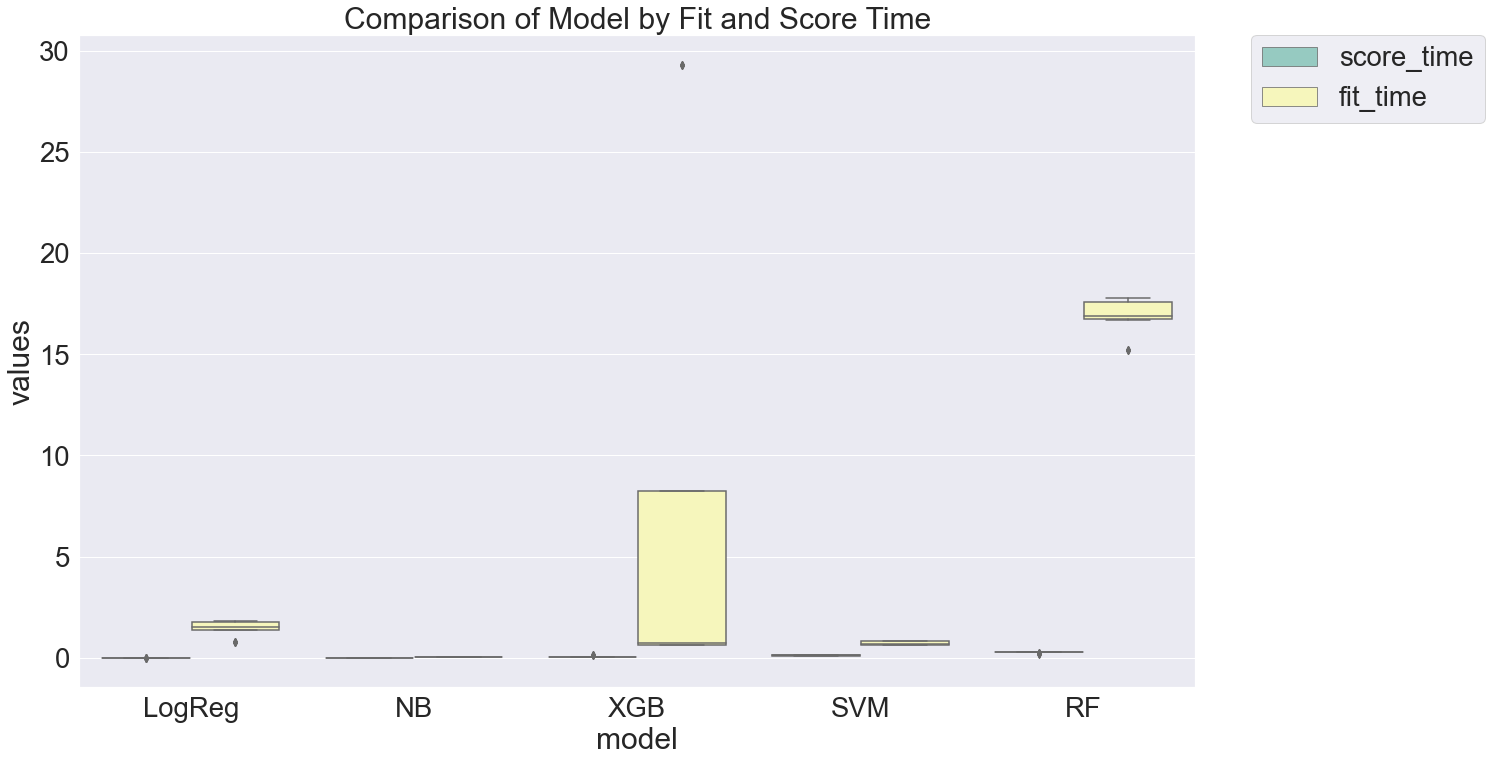

In [52]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [53]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.392208  0.009802      0.296068  0.014015
NB          0.366250  0.018786      0.287513  0.013905
RF          0.393500  0.014608      0.296680  0.011617
SVM         0.395250  0.017250      0.324123  0.011776
XGB         0.340792  0.012407      0.200376  0.015246

In [54]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time             fit_time          
             mean       std       mean       std
model                                           
LogReg   0.009423  0.002479   1.482960  0.351758
NB       0.007912  0.001412   0.018997  0.000971
RF       0.267020  0.023639  16.877202  0.790598
SVM      0.117009  0.010474   0.731726  0.093402
XGB      0.040947  0.036506   6.762503  9.626510

#### ngram level tf-idf (ngram (4,5))

In [55]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(4,5), max_features=5000) #change ngram_range
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [56]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     1.0000    0.0117    0.0231       342
     Neutral     1.0000    0.0030    0.0059       336
        Good     0.3236    1.0000    0.4890       322

    accuracy                         0.3270      1000
   macro avg     0.7745    0.3382    0.1727      1000
weighted avg     0.7822    0.3270    0.1674      1000

RF
              precision    recall  f1-score   support

        Poor     1.0000    0.0117    0.0231       342
     Neutral     1.0000    0.0030    0.0059       336
        Good     0.3236    1.0000    0.4890       322

    accuracy                         0.3270      1000
   macro avg     0.7745    0.3382    0.1727      1000
weighted avg     0.7822    0.3270    0.1674      1000

SVM
              precision    recall  f1-score   support

        Poor     1.0000    0.0058    0.0116       342
     Neutral     1.0000    0.0030    0.0059       336
        Good     0.3230    1.0000    0.4882       322

    ac

In [57]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

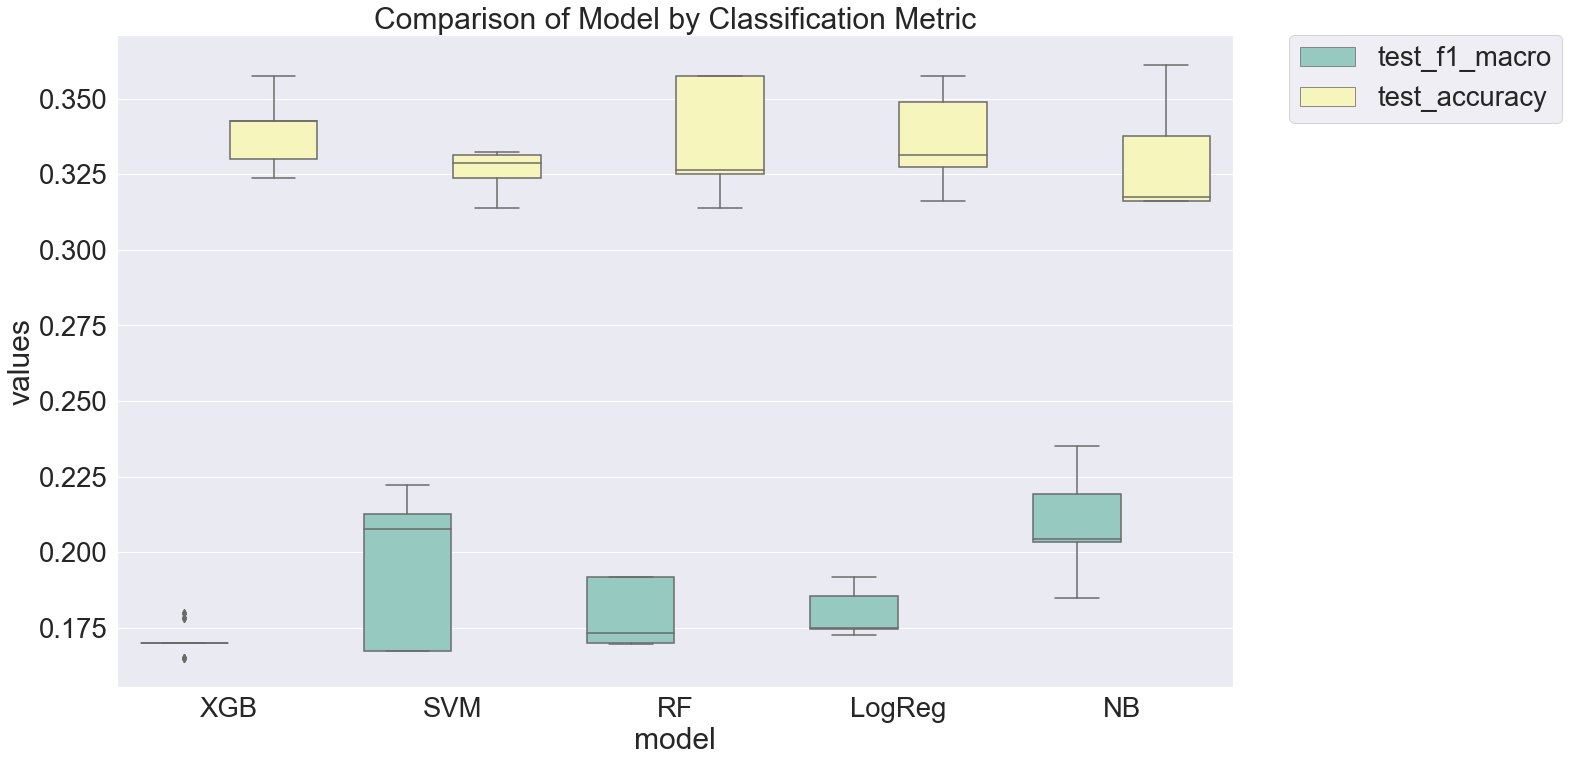

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

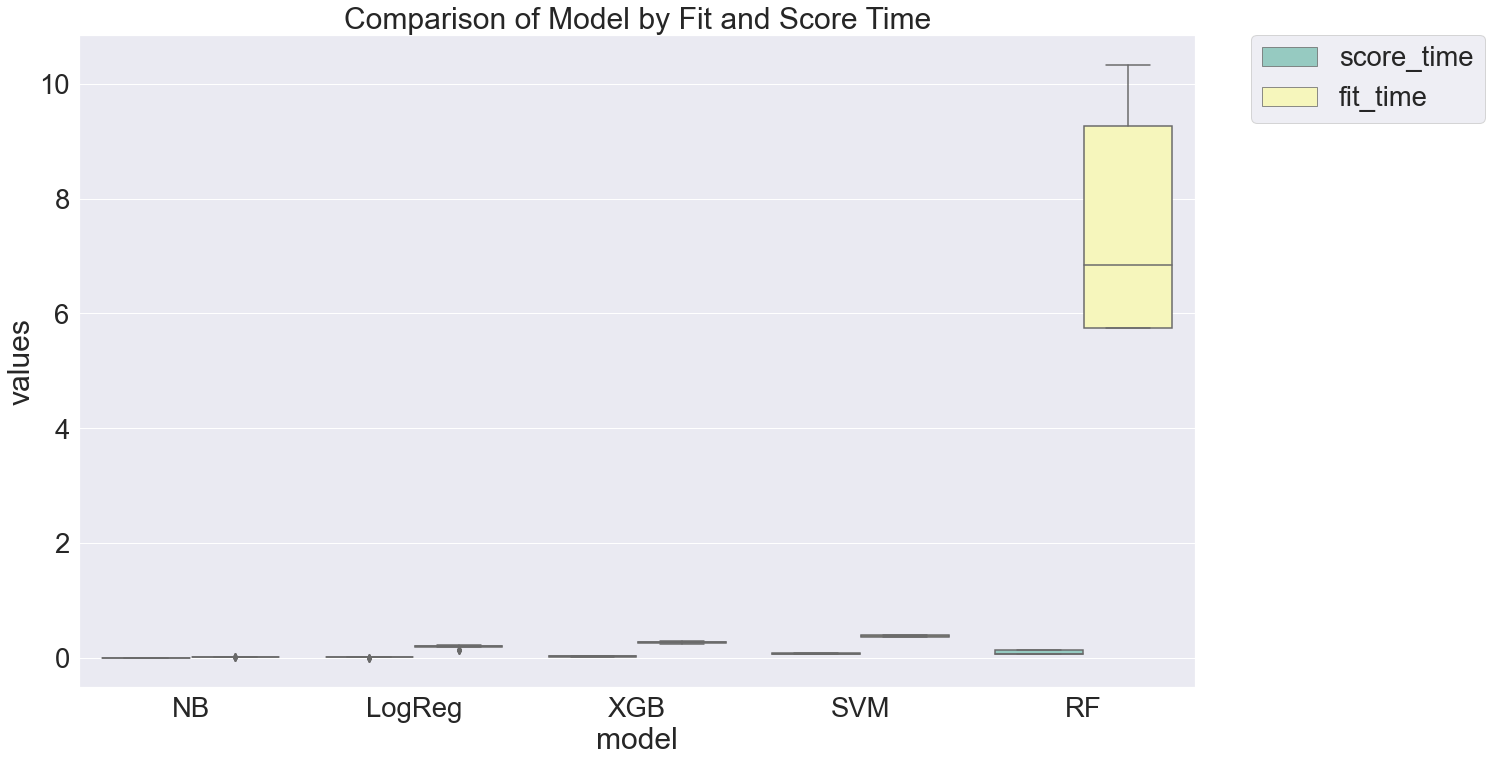

In [59]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [60]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.335250  0.014682      0.179336  0.007342
NB          0.329833  0.017943      0.211276  0.015203
RF          0.333792  0.016536      0.177836  0.009766
SVM         0.325917  0.006743      0.192624  0.022859
XGB         0.337875  0.011588      0.170912  0.004899

In [61]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.009917  0.001489  0.194857  0.032482
NB       0.006052  0.000881  0.012379  0.001701
RF       0.094164  0.029330  7.383374  1.690708
SVM      0.075363  0.009231  0.383774  0.017426
XGB      0.025557  0.003440  0.271972  0.020877

#### ngram level tf-idf (ngram (5,6))

In [62]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(5,6), max_features=5000) #change ngram_range
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [63]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     1.0000    0.0029    0.0058       342
     Neutral     1.0000    0.0030    0.0059       336
        Good     0.3226    1.0000    0.4879       322

    accuracy                         0.3240      1000
   macro avg     0.7742    0.3353    0.1665      1000
weighted avg     0.7819    0.3240    0.1611      1000

RF
              precision    recall  f1-score   support

        Poor     1.0000    0.0029    0.0058       342
     Neutral     0.3363    1.0000    0.5034       336
        Good     0.0000    0.0000    0.0000       322

    accuracy                         0.3370      1000
   macro avg     0.4454    0.3343    0.1697      1000
weighted avg     0.4550    0.3370    0.1711      1000

SVM
              precision    recall  f1-score   support

        Poor     0.0000    0.0000    0.0000       342
     Neutral     0.3453    0.9435    0.5056       336
        Good     0.4146    0.1056    0.1683       322

    ac

In [64]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

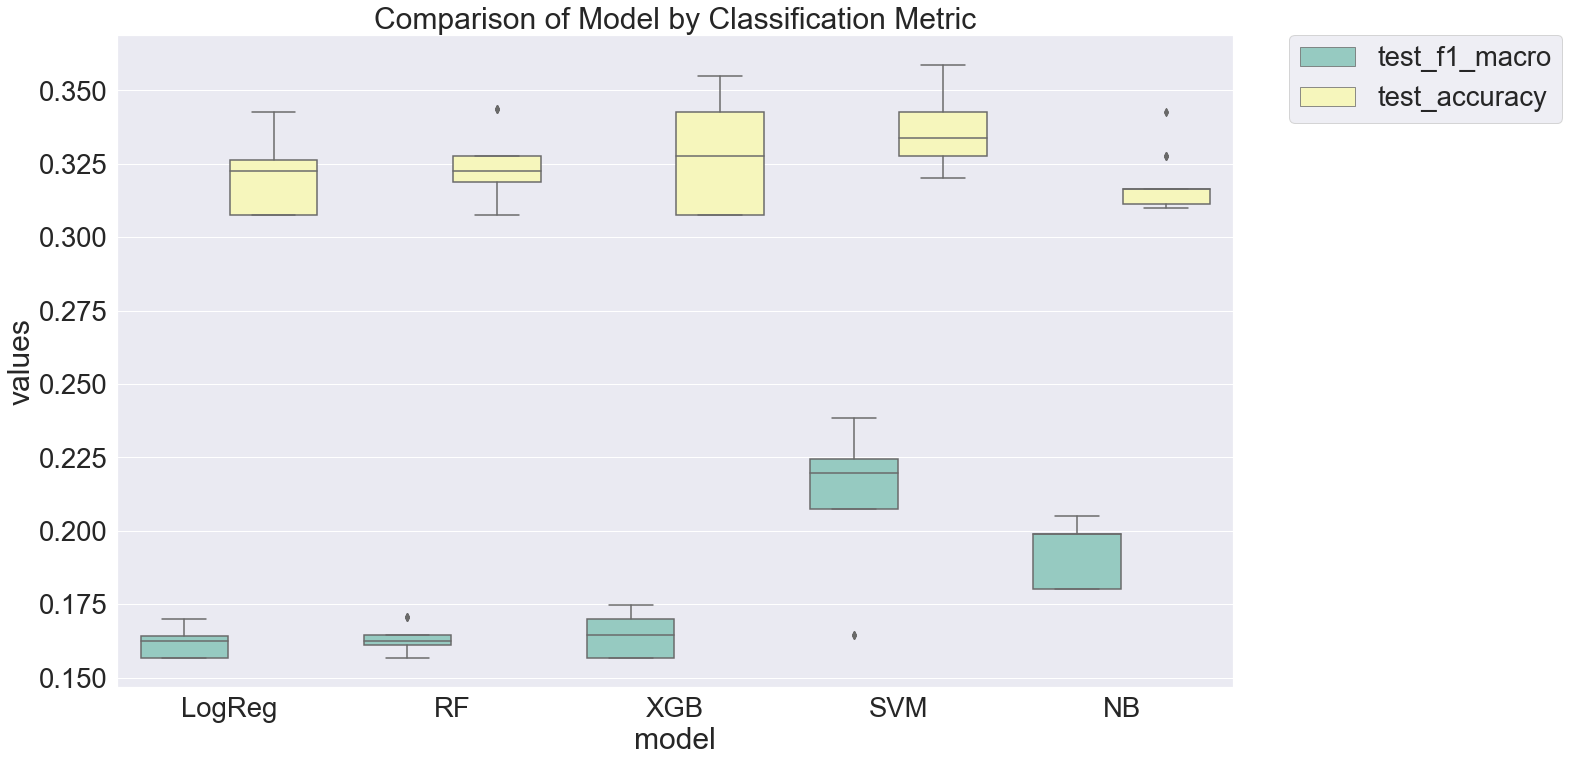

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

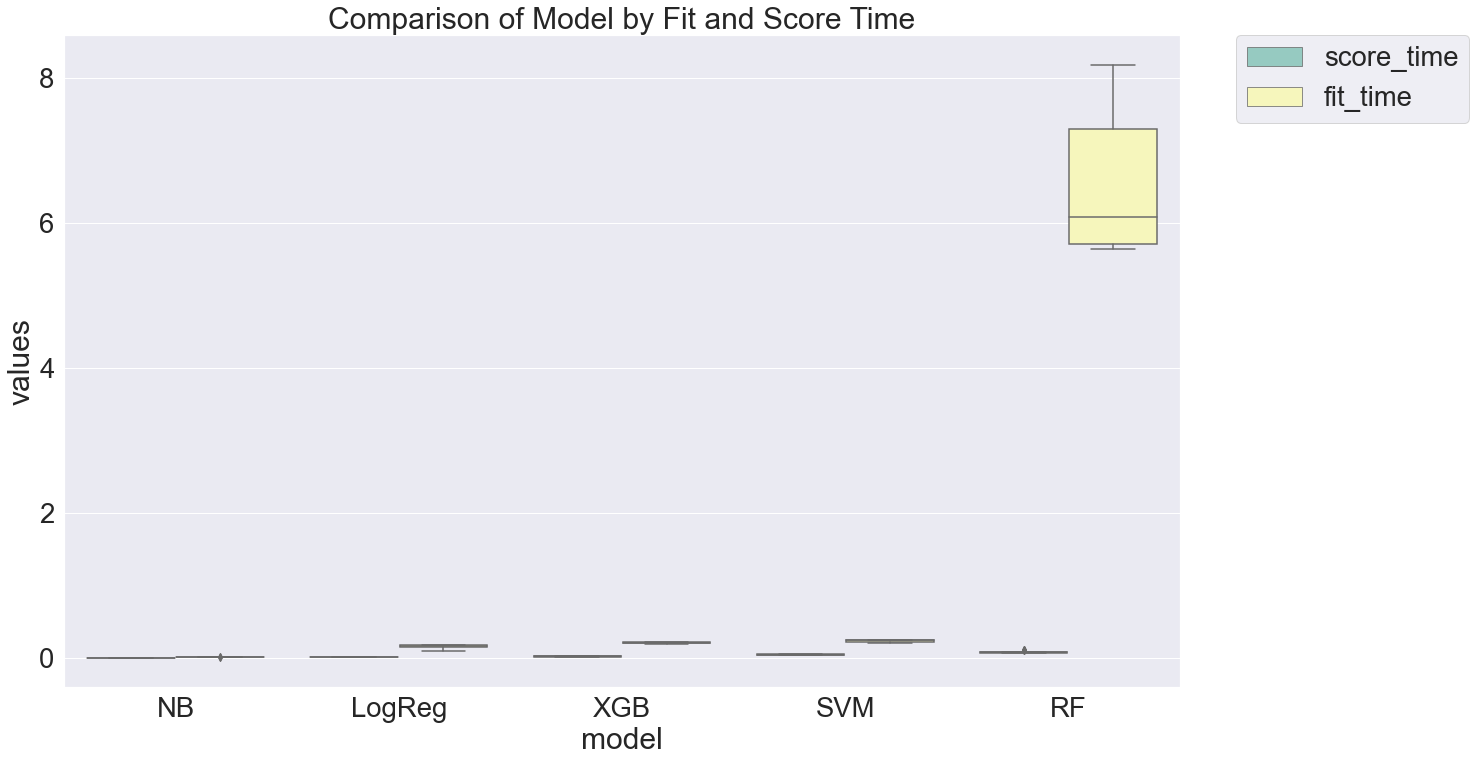

In [66]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [67]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.320333  0.011794      0.161705  0.004493
NB          0.317333  0.009090      0.191905  0.009389
RF          0.322958  0.011426      0.162709  0.004333
SVM         0.335542  0.012078      0.213467  0.021582
XGB         0.329833  0.018241      0.165260  0.006874

In [68]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.009486  0.002473  0.156289  0.027186
NB       0.004512  0.000688  0.009653  0.001189
RF       0.078388  0.011808  6.419746  0.934243
SVM      0.046026  0.003009  0.238764  0.016148
XGB      0.020520  0.001231  0.207284  0.011534

## max_feature

In [ ]:
#This is an experiemnt to test the impact onf max_feature

#### word level tf-idf - max_feature

In [70]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=10000)
tfidf_vect.fit(feature_df['cleaned_text'])
xtrain_tfidf =  tfidf_vect.transform(x_train)
xvalid_tfidf =  tfidf_vect.transform(x_test)

In [71]:
# Model building for word level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf, y_train)
    y_pred = clf.predict(xvalid_tfidf)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9094    0.7632    0.8299       342
     Neutral     0.6998    0.9018    0.7880       336
        Good     0.7964    0.6925    0.7409       322

    accuracy                         0.7870      1000
   macro avg     0.8019    0.7858    0.7863      1000
weighted avg     0.8026    0.7870    0.7872      1000

RF
              precision    recall  f1-score   support

        Poor     0.8931    0.8304    0.8606       342
     Neutral     0.7673    0.8929    0.8253       336
        Good     0.8041    0.7267    0.7635       322

    accuracy                         0.8180      1000
   macro avg     0.8215    0.8167    0.8165      1000
weighted avg     0.8222    0.8180    0.8175      1000

SVM
              precision    recall  f1-score   support

        Poor     0.9524    0.7018    0.8081       342
     Neutral     0.6696    0.9107    0.7718       336
        Good     0.7801    0.7050    0.7406       322

    ac

In [72]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

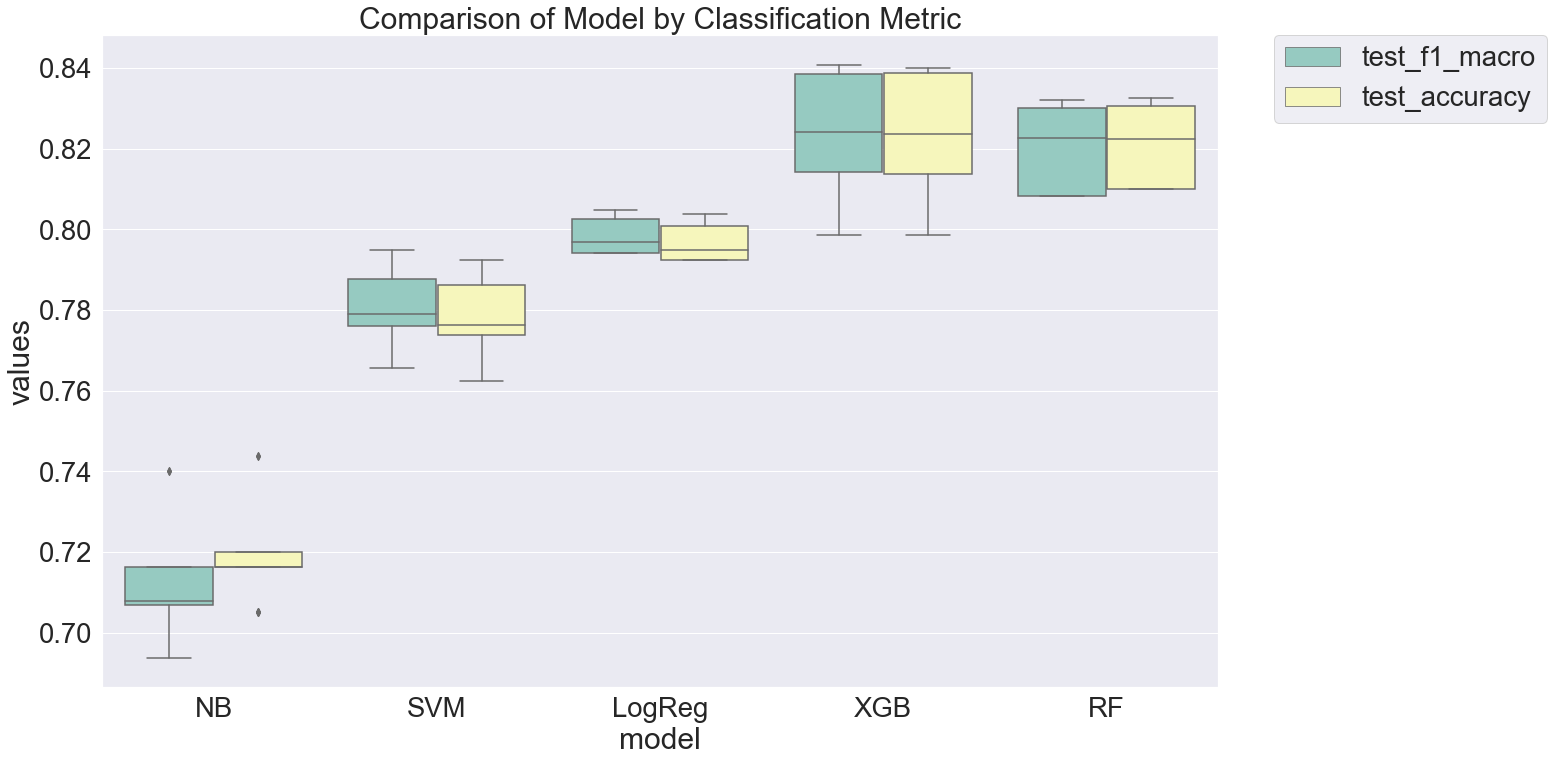

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

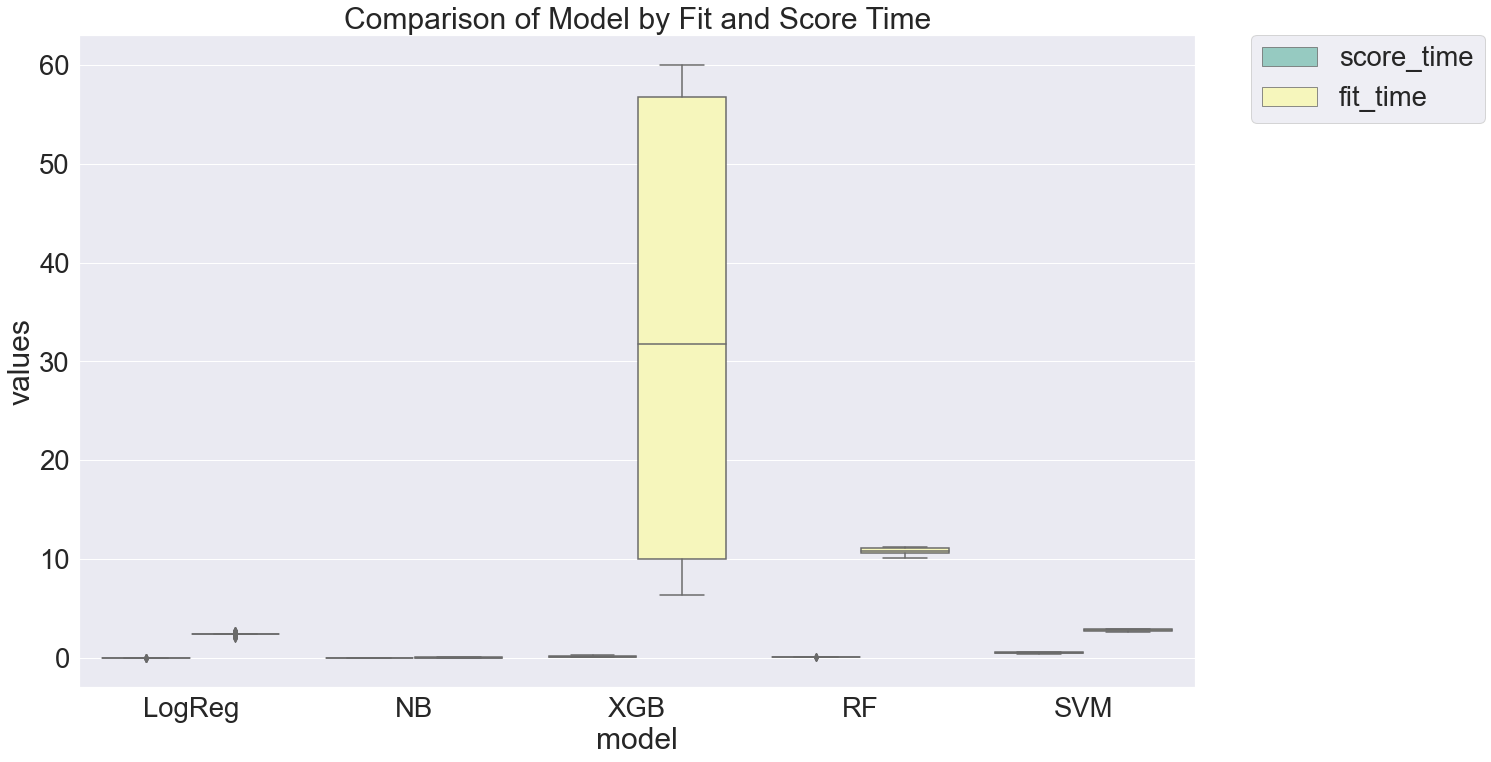

In [74]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [75]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.796750  0.004108      0.798403  0.004011
NB          0.717583  0.008465      0.710211  0.010629
RF          0.820833  0.008902      0.820279  0.009337
SVM         0.778333  0.009578      0.780773  0.009309
XGB         0.823250  0.014796      0.823551  0.014869

In [76]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time             fit_time           
             mean       std       mean        std
model                                            
LogReg   0.013167  0.002751   2.405802   0.193076
NB       0.010062  0.000008   0.022419   0.003561
RF       0.120779  0.000372  10.755608   0.376135
SVM      0.493755  0.054454   2.789887   0.111391
XGB      0.113449  0.079942  30.491308  22.879685

#### word level tf-idf

In [77]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=20000)
tfidf_vect.fit(feature_df['cleaned_text'])
xtrain_tfidf =  tfidf_vect.transform(x_train)
xvalid_tfidf =  tfidf_vect.transform(x_test)

In [78]:
# Model building for word level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf, y_train)
    y_pred = clf.predict(xvalid_tfidf)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9094    0.7632    0.8299       342
     Neutral     0.6998    0.9018    0.7880       336
        Good     0.7964    0.6925    0.7409       322

    accuracy                         0.7870      1000
   macro avg     0.8019    0.7858    0.7863      1000
weighted avg     0.8026    0.7870    0.7872      1000

RF
              precision    recall  f1-score   support

        Poor     0.8854    0.8363    0.8602       342
     Neutral     0.7575    0.9018    0.8234       336
        Good     0.8231    0.7081    0.7613       322

    accuracy                         0.8170      1000
   macro avg     0.8220    0.8154    0.8149      1000
weighted avg     0.8224    0.8170    0.8160      1000

SVM
              precision    recall  f1-score   support

        Poor     0.9524    0.7018    0.8081       342
     Neutral     0.6696    0.9107    0.7718       336
        Good     0.7801    0.7050    0.7406       322

    ac

In [79]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

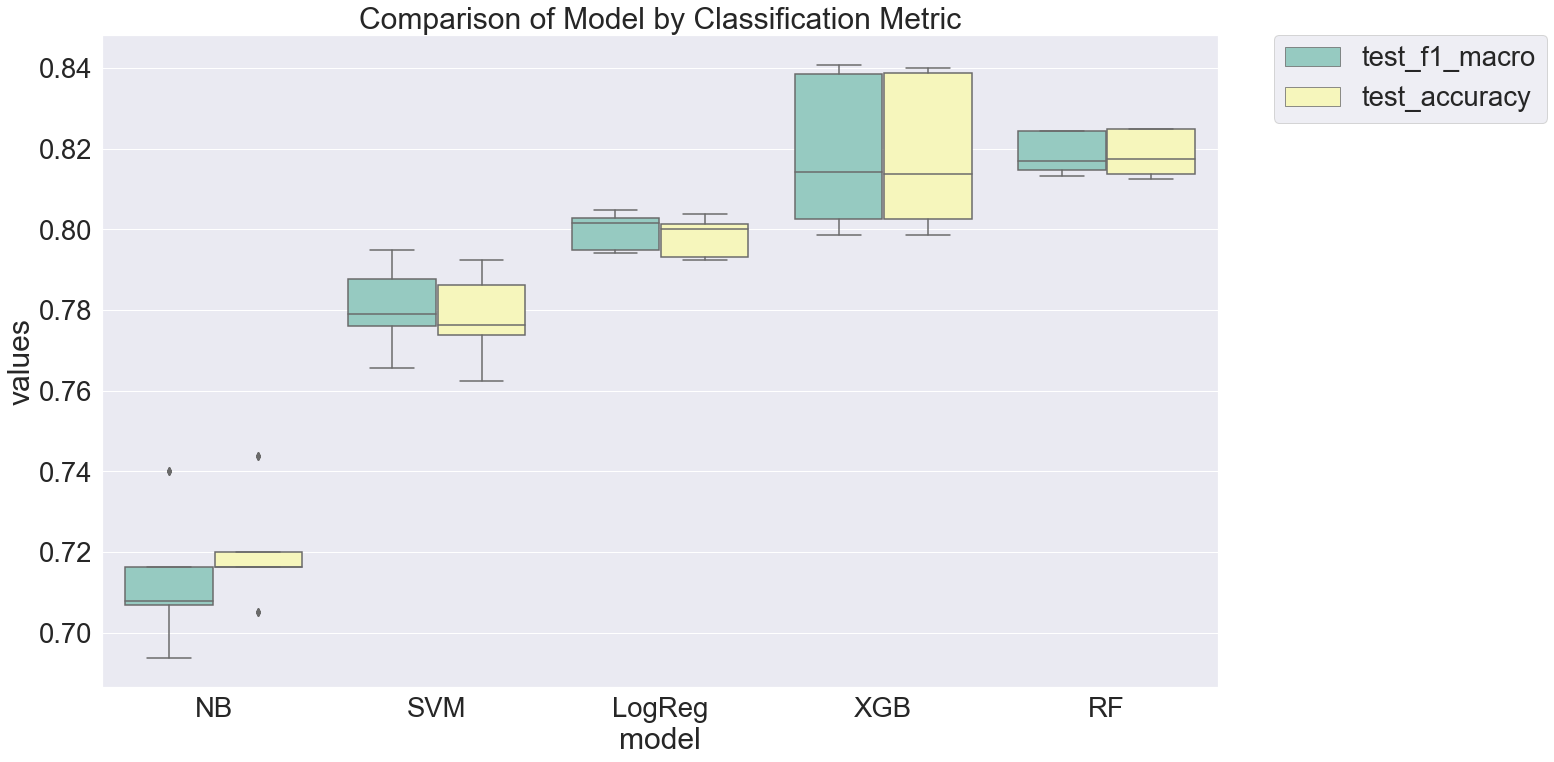

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

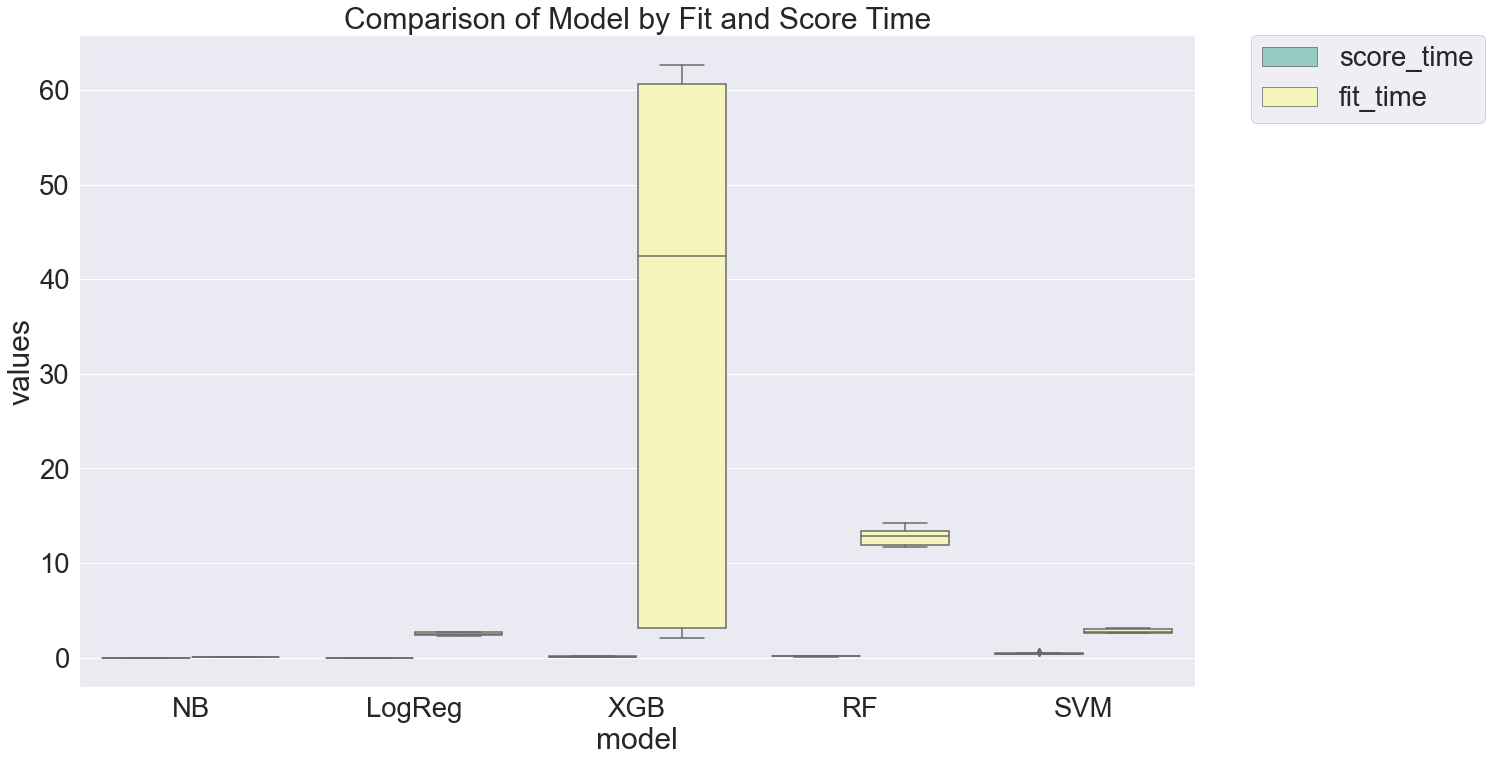

In [81]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [82]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.798333  0.004157      0.799915  0.004042
NB          0.719833  0.011930      0.712749  0.014348
RF          0.819167  0.005698      0.819206  0.005086
SVM         0.779208  0.009159      0.781614  0.008882
XGB         0.820208  0.016787      0.820549  0.017031

In [83]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time             fit_time           
             mean       std       mean        std
model                                            
LogReg   0.012180  0.001952   2.523286   0.170779
NB       0.007641  0.003740   0.031500   0.012388
RF       0.173567  0.036693  12.865949   0.906868
SVM      0.452978  0.064269   2.818723   0.237328
XGB      0.107167  0.054485  33.871085  26.726027

#### word level tf-idf

In [84]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=30000)
tfidf_vect.fit(feature_df['cleaned_text'])
xtrain_tfidf =  tfidf_vect.transform(x_train)
xvalid_tfidf =  tfidf_vect.transform(x_test)

In [85]:
# Model building for word level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf, y_train)
    y_pred = clf.predict(xvalid_tfidf)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9094    0.7632    0.8299       342
     Neutral     0.6998    0.9018    0.7880       336
        Good     0.7964    0.6925    0.7409       322

    accuracy                         0.7870      1000
   macro avg     0.8019    0.7858    0.7863      1000
weighted avg     0.8026    0.7870    0.7872      1000

RF
              precision    recall  f1-score   support

        Poor     0.8910    0.8363    0.8627       342
     Neutral     0.7690    0.9018    0.8301       336
        Good     0.8211    0.7267    0.7710       322

    accuracy                         0.8230      1000
   macro avg     0.8270    0.8216    0.8213      1000
weighted avg     0.8275    0.8230    0.8222      1000

SVM
              precision    recall  f1-score   support

        Poor     0.9524    0.7018    0.8081       342
     Neutral     0.6696    0.9107    0.7718       336
        Good     0.7801    0.7050    0.7406       322

    ac

In [86]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

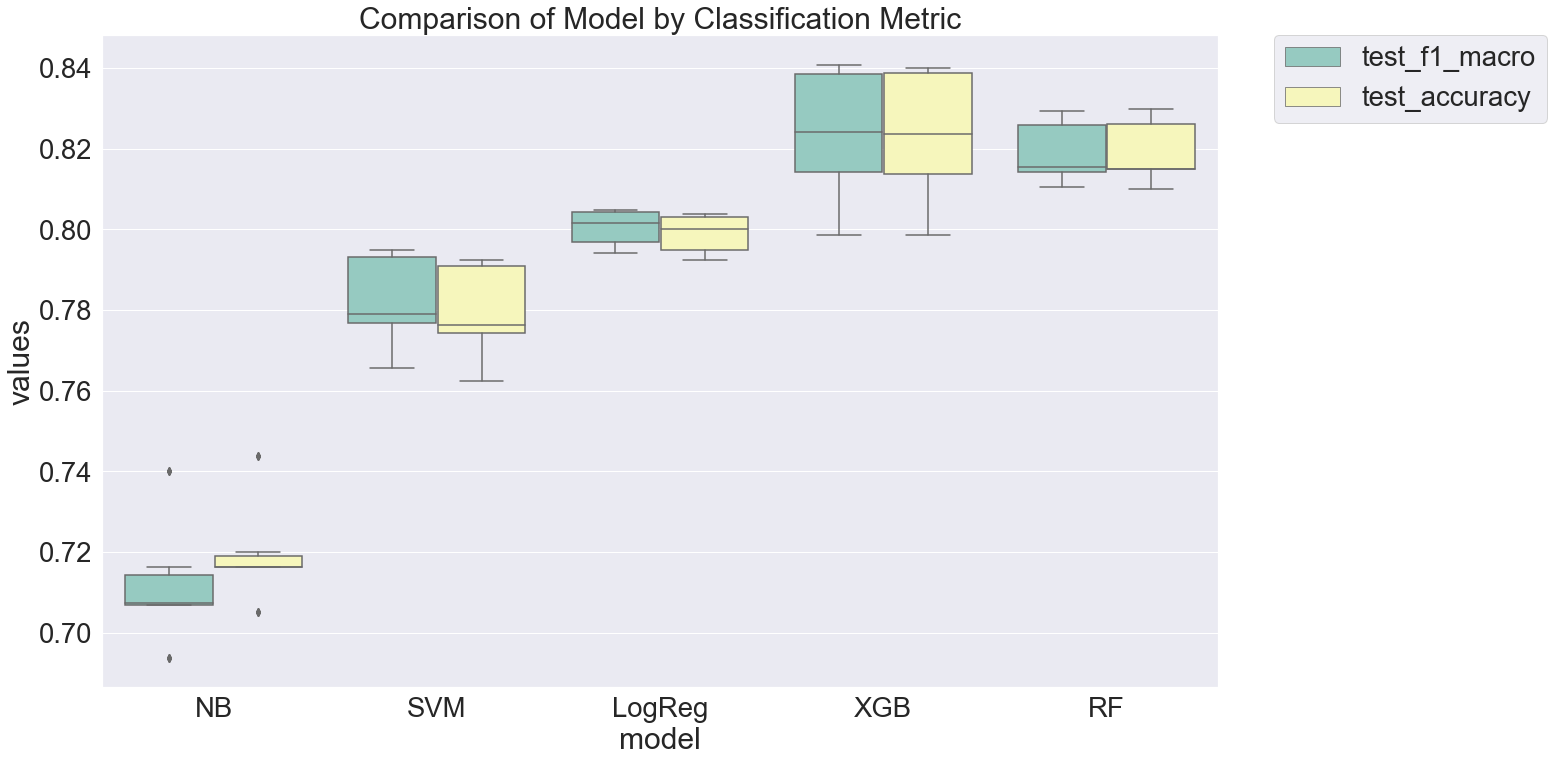

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

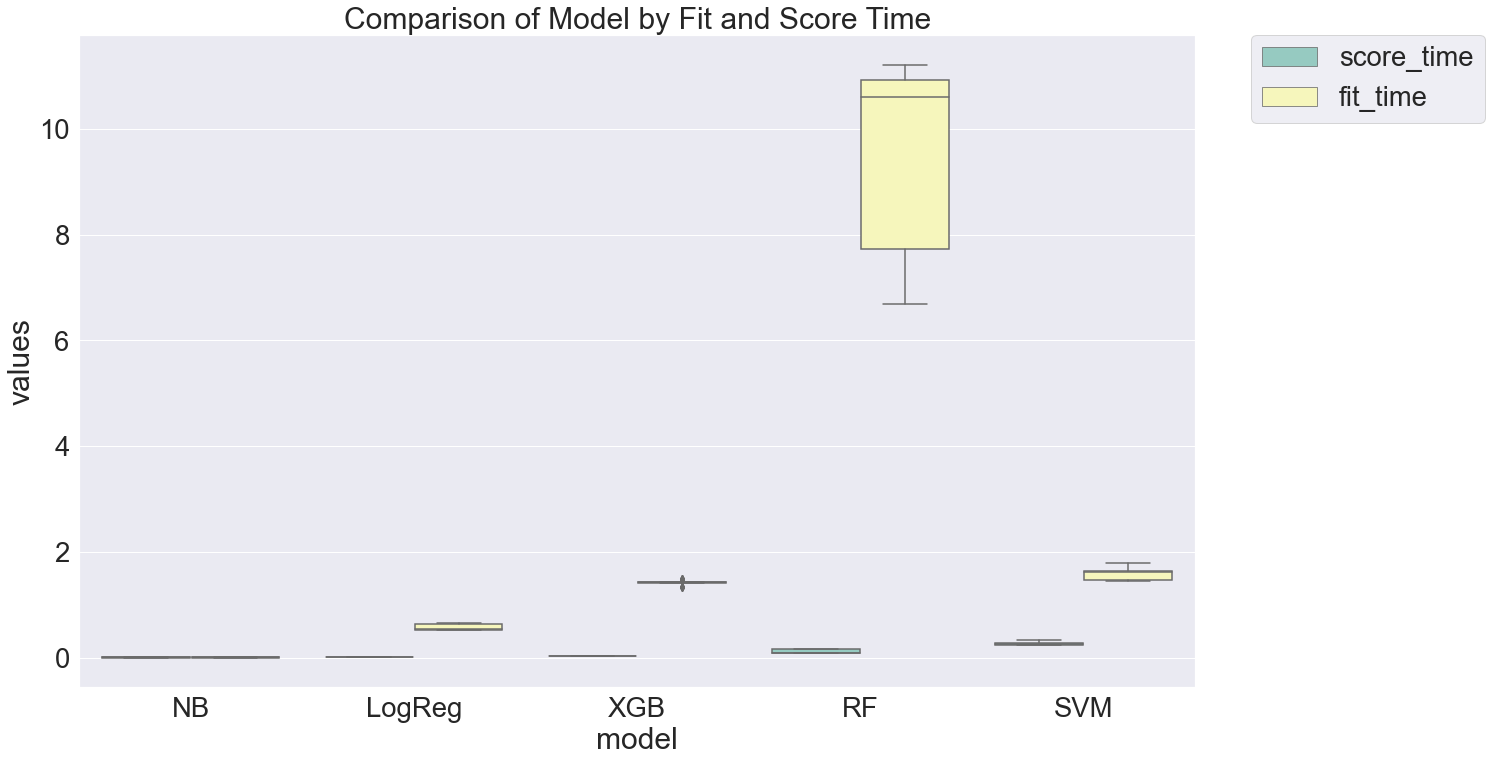

In [88]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [89]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.799333  0.004110      0.800866  0.003905
NB          0.718958  0.012265      0.710991  0.014754
RF          0.819417  0.007541      0.819219  0.007272
SVM         0.780083  0.010091      0.782526  0.009787
XGB         0.823250  0.016451      0.823444  0.016549

#### ngram level tf-idf - max_feature

In [90]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=10000)
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [91]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.7762    0.4766    0.5906       342
     Neutral     0.4921    0.8393    0.6205       336
        Good     0.6544    0.4410    0.5269       322

    accuracy                         0.5870      1000
   macro avg     0.6409    0.5856    0.5793      1000
weighted avg     0.6415    0.5870    0.5801      1000

RF
              precision    recall  f1-score   support

        Poor     0.7765    0.4064    0.5336       342
     Neutral     0.4689    0.8750    0.6106       336
        Good     0.6701    0.4037    0.5039       322

    accuracy                         0.5630      1000
   macro avg     0.6385    0.5617    0.5494      1000
weighted avg     0.6389    0.5630    0.5499      1000

SVM
              precision    recall  f1-score   support

        Poor     0.7333    0.4825    0.5820       342
     Neutral     0.5501    0.5714    0.5606       336
        Good     0.5117    0.6770    0.5829       322

    ac

In [92]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

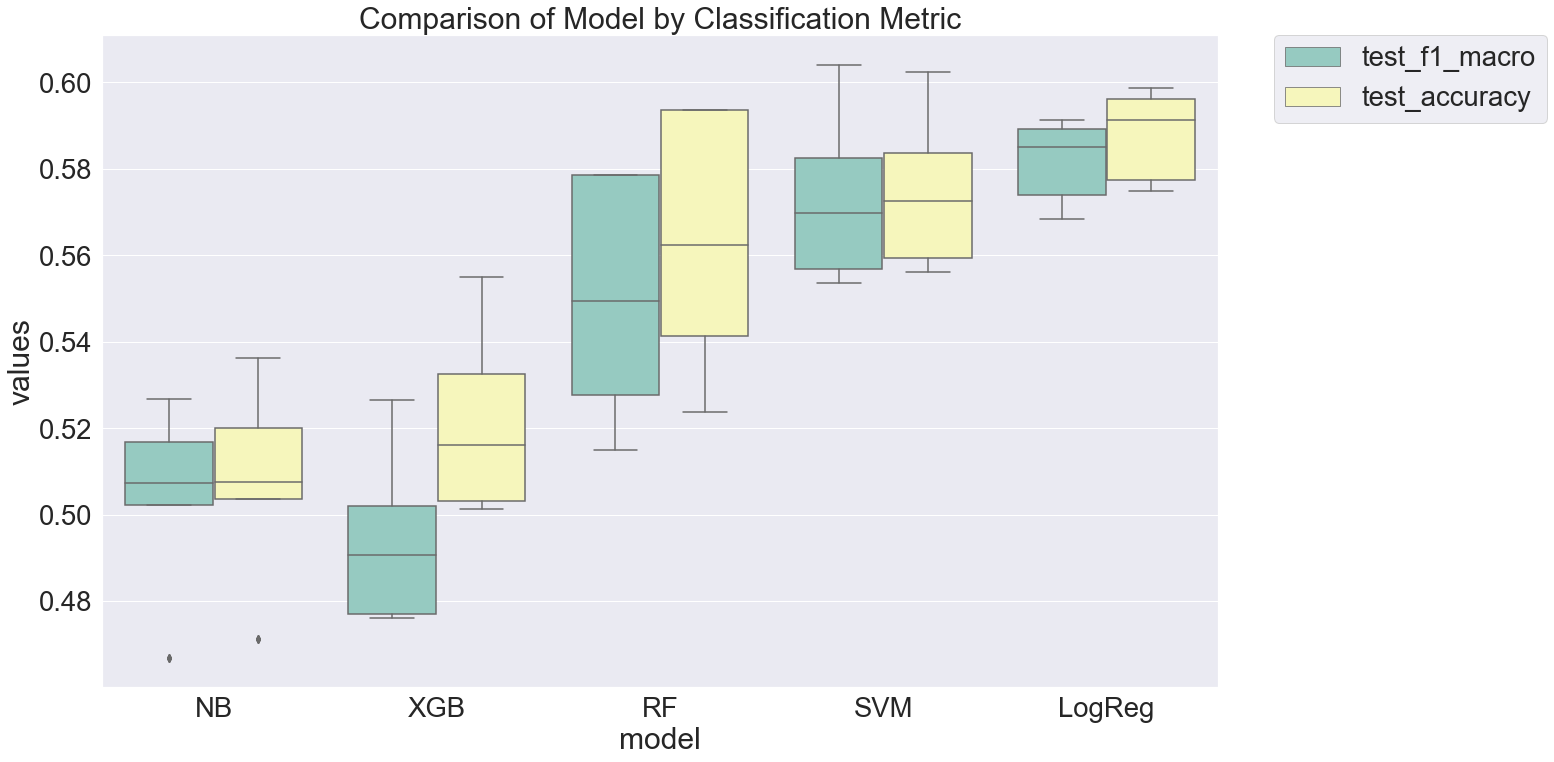

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

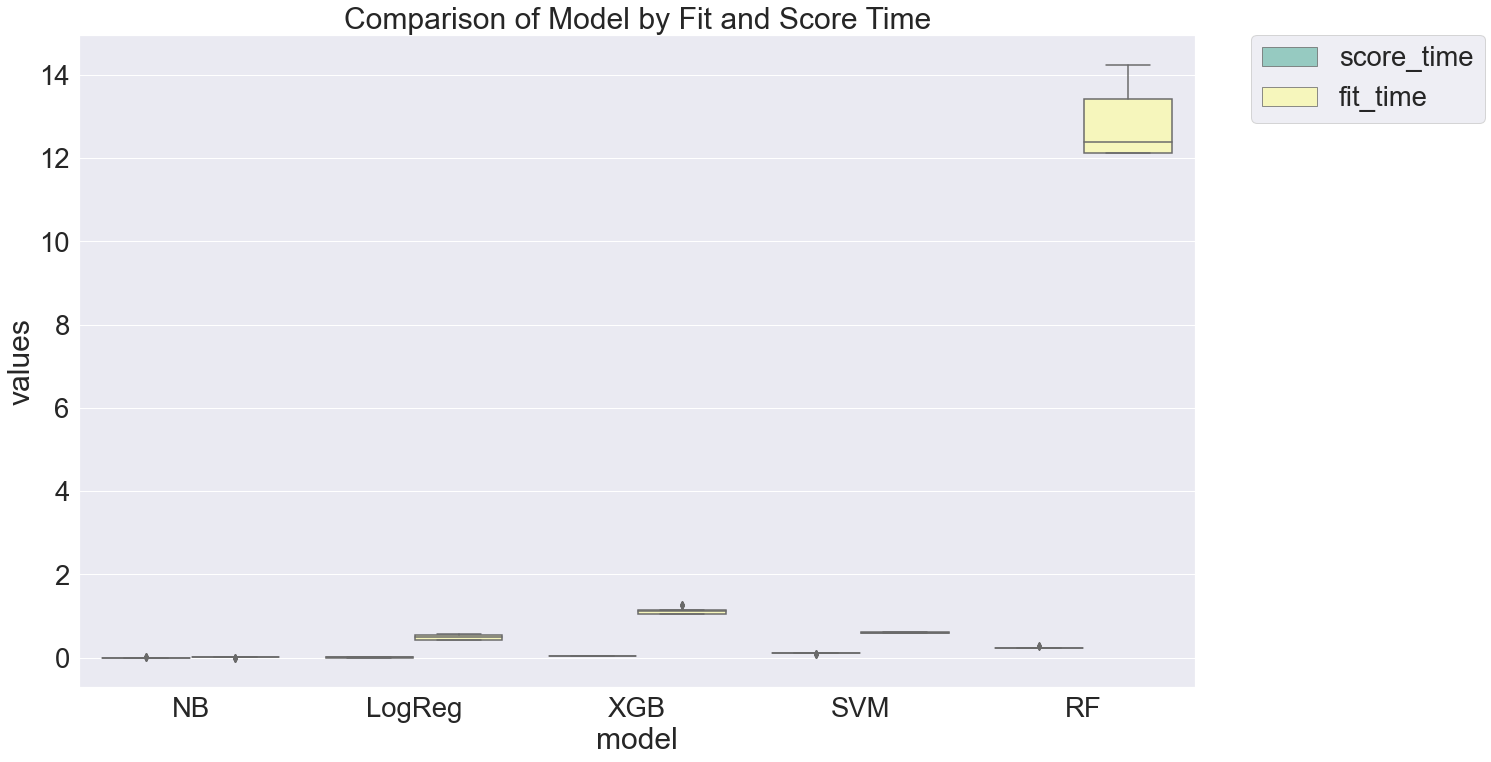

In [94]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [95]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.588083  0.009266      0.581645  0.008795
NB          0.508167  0.022389      0.504166  0.020987
RF          0.564083  0.023907      0.550111  0.022386
SVM         0.576542  0.017316      0.575168  0.018973
XGB         0.521708  0.019880      0.494451  0.018606

In [96]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time             fit_time          
             mean       std       mean       std
model                                           
LogReg   0.005701  0.005071   0.498254  0.060049
NB       0.002489  0.004442   0.007936  0.003709
RF       0.232150  0.016477  12.697893  0.709213
SVM      0.100613  0.003700   0.599604  0.005268
XGB      0.033739  0.004384   1.115293  0.070022

In [97]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=20000)
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [98]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.7701    0.4211    0.5444       342
     Neutral     0.4780    0.8750    0.6183       336
        Good     0.6768    0.4161    0.5154       322

    accuracy                         0.5720      1000
   macro avg     0.6416    0.5707    0.5594      1000
weighted avg     0.6419    0.5720    0.5599      1000

RF
              precision    recall  f1-score   support

        Poor     0.7987    0.3596    0.4960       342
     Neutral     0.4490    0.9048    0.6002       336
        Good     0.6805    0.3571    0.4684       322

    accuracy                         0.5420      1000
   macro avg     0.6427    0.5405    0.5215      1000
weighted avg     0.6431    0.5420    0.5221      1000

SVM
              precision    recall  f1-score   support

        Poor     0.7448    0.4181    0.5356       342
     Neutral     0.5435    0.4464    0.4902       336
        Good     0.4361    0.7205    0.5433       322

    ac

In [99]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

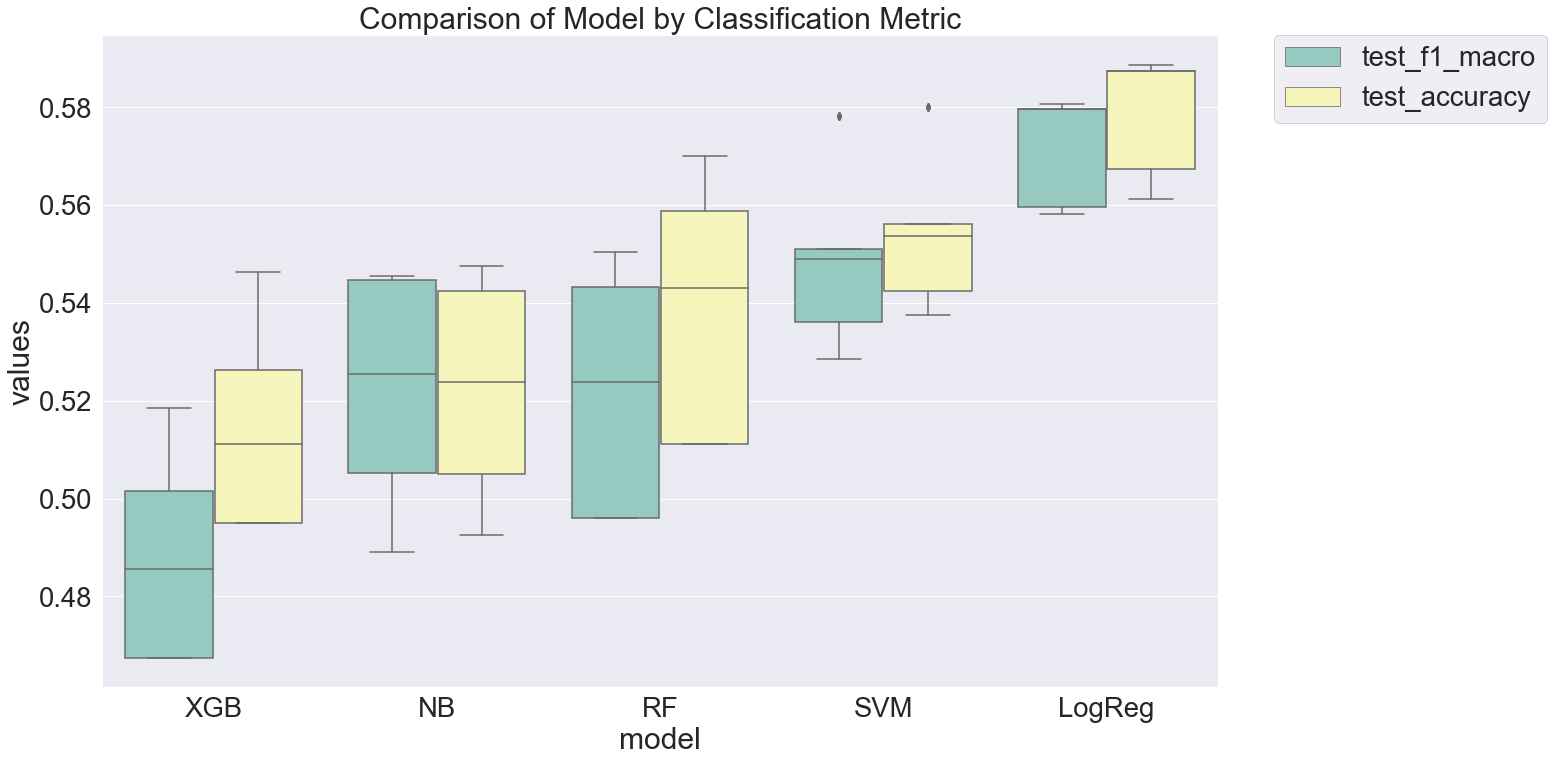

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

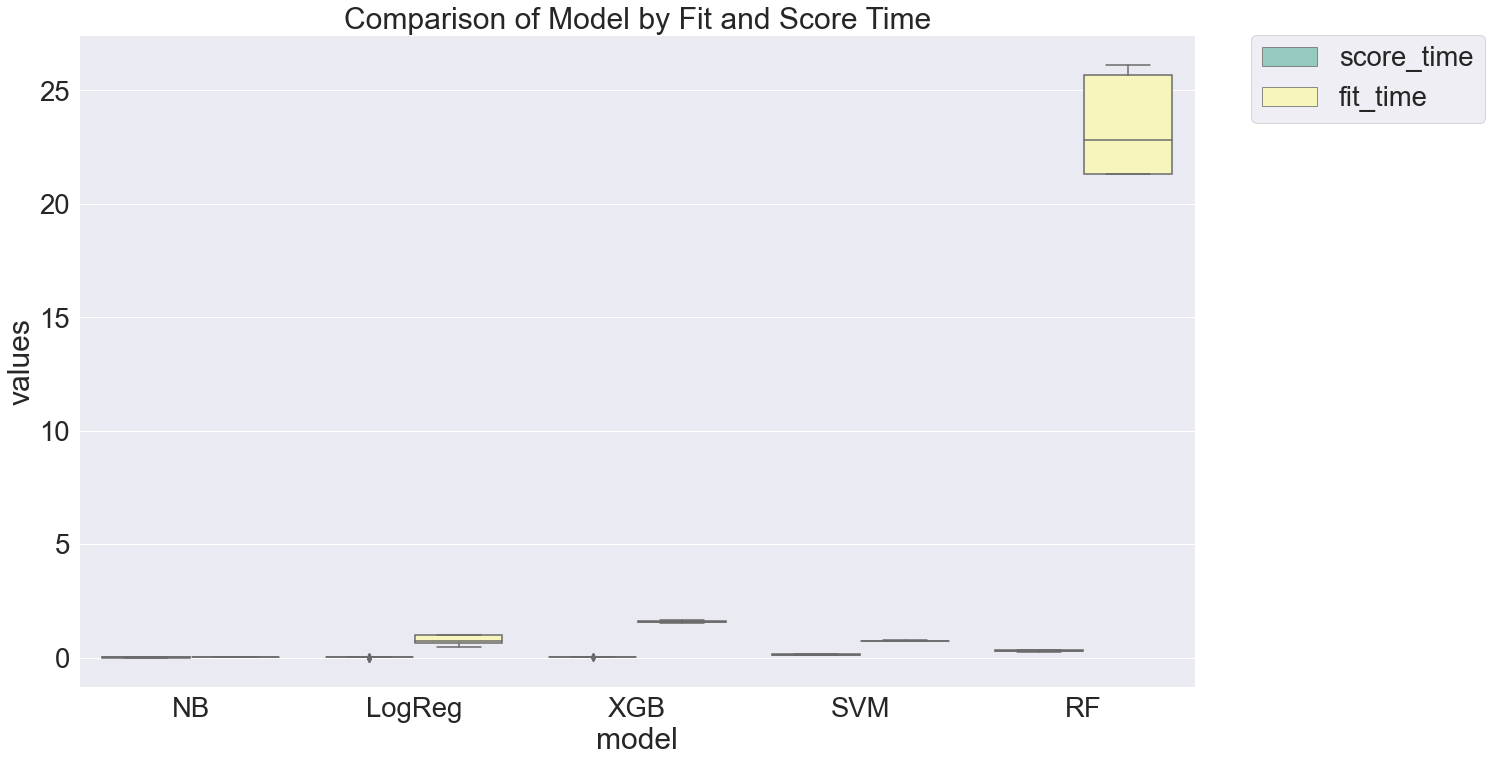

In [101]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [102]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.579417  0.011591      0.572171  0.010209
NB          0.522792  0.019580      0.523169  0.020871
RF          0.539125  0.022148      0.522306  0.021168
SVM         0.555375  0.015443      0.550207  0.017793
XGB         0.515542  0.017201      0.488222  0.017283

In [103]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=30000)
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [104]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.8079    0.4181    0.5511       342
     Neutral     0.4646    0.8780    0.6076       336
        Good     0.6968    0.4068    0.5137       322

    accuracy                         0.5690      1000
   macro avg     0.6564    0.5676    0.5575      1000
weighted avg     0.6568    0.5690    0.5580      1000

RF
              precision    recall  f1-score   support

        Poor     0.8356    0.3567    0.5000       342
     Neutral     0.4387    0.9375    0.5977       336
        Good     0.6838    0.2888    0.4061       322

    accuracy                         0.5300      1000
   macro avg     0.6527    0.5277    0.5013      1000
weighted avg     0.6534    0.5300    0.5026      1000

SVM
              precision    recall  f1-score   support

        Poor     0.8199    0.3860    0.5249       342
     Neutral     0.5781    0.3304    0.4205       336
        Good     0.4158    0.8354    0.5552       322

    ac

In [105]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

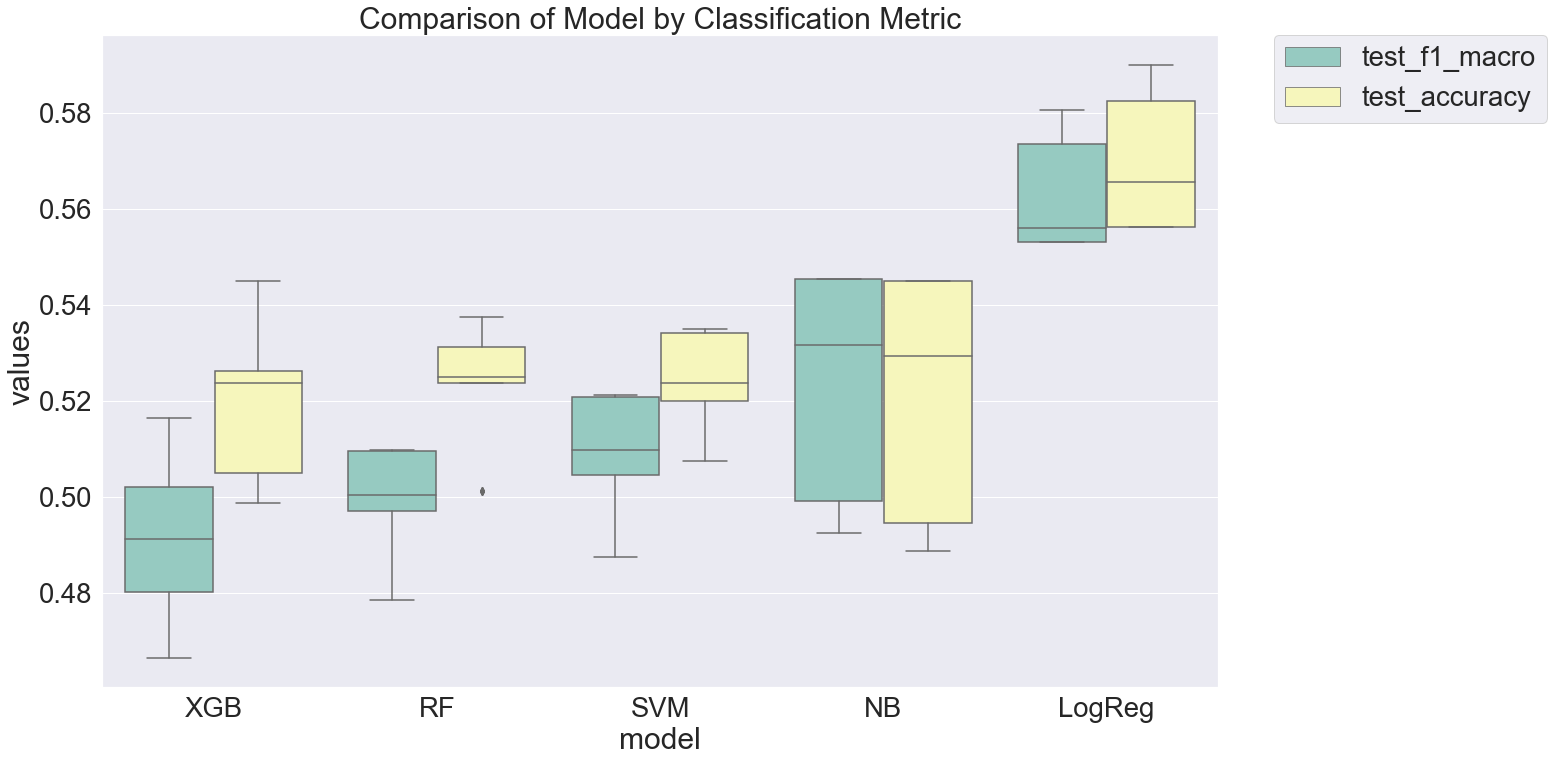

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

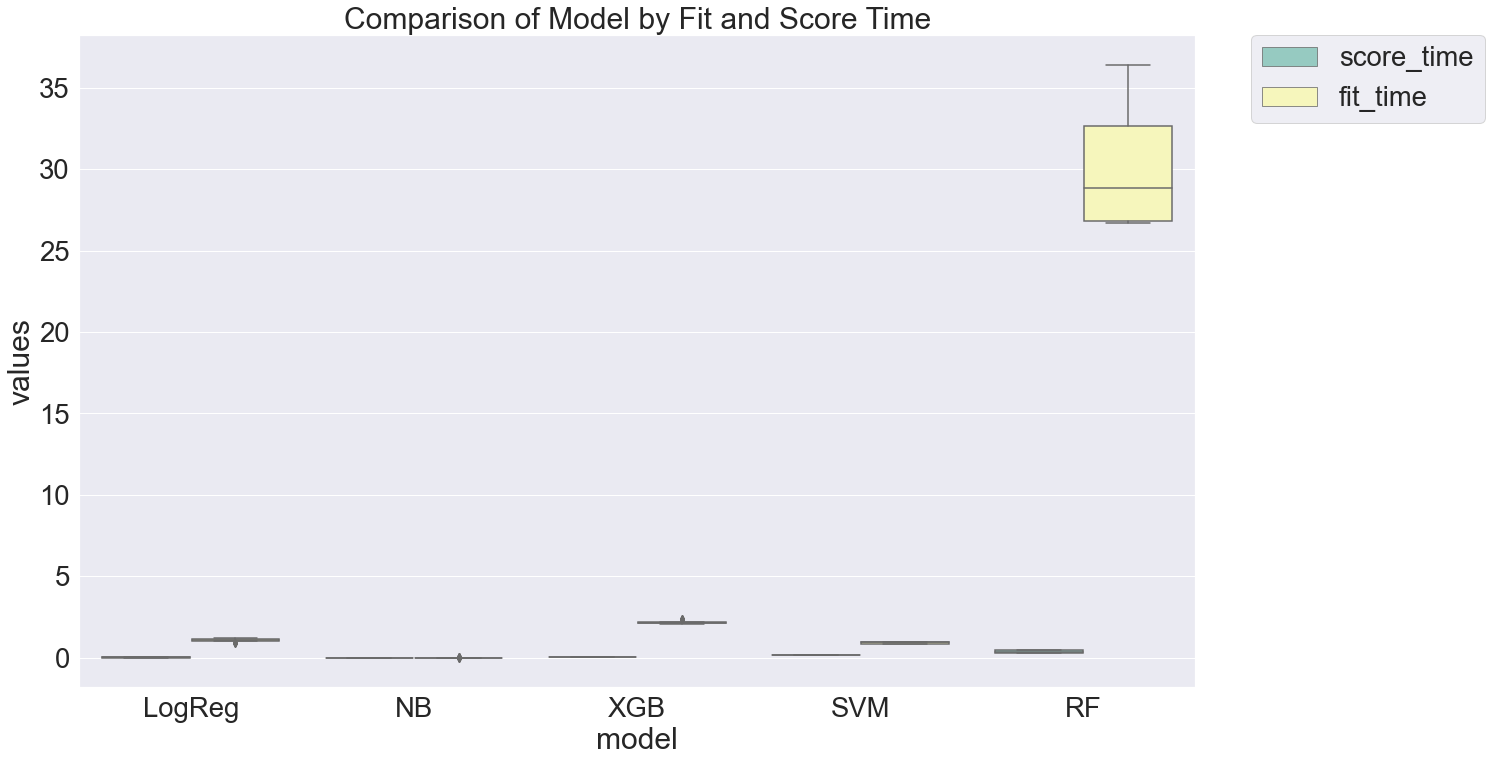

In [107]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [108]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.568792  0.013013      0.561412  0.011455
NB          0.522208  0.023596      0.524833  0.022323
RF          0.522917  0.011810      0.498587  0.011378
SVM         0.525083  0.009061      0.510595  0.011354
XGB         0.518833  0.016641      0.491107  0.016690